## Data Pulling

sync to imdbpie to pull the top 250

In [1]:
from imdbpie import Imdb
imdb = Imdb()
imdb = Imdb(anonymize=True)
imdb = Imdb(cache=True)

In [2]:
raw = imdb.top_250()

In [3]:
raw

[{u'can_rate': True,
  u'image': {u'height': 1388,
   u'url': u'http://ia.media-imdb.com/images/M/MV5BODU4MjU4NjIwNl5BMl5BanBnXkFtZTgwMDU2MjEyMDE@._V1_.jpg',
   u'width': 933},
  u'num_votes': 1679506,
  u'rating': 9.3,
  u'tconst': u'tt0111161',
  u'title': u'The Shawshank Redemption',
  u'type': u'feature',
  u'year': u'1994'},
 {u'can_rate': True,
  u'image': {u'height': 500,
   u'url': u'http://ia.media-imdb.com/images/M/MV5BMjEyMjcyNDI4MF5BMl5BanBnXkFtZTcwMDA5Mzg3OA@@._V1_.jpg',
   u'width': 333},
  u'num_votes': 1149127,
  u'rating': 9.2,
  u'tconst': u'tt0068646',
  u'title': u'The Godfather',
  u'type': u'feature',
  u'year': u'1972'},
 {u'can_rate': True,
  u'image': {u'height': 500,
   u'url': u'http://ia.media-imdb.com/images/M/MV5BNDc2NTM3MzU1Nl5BMl5BanBnXkFtZTcwMTA5Mzg3OA@@._V1_.jpg',
   u'width': 333},
  u'num_votes': 785866,
  u'rating': 9,
  u'tconst': u'tt0071562',
  u'title': u'The Godfather: Part II',
  u'type': u'feature',
  u'year': u'1974'},
 {u'can_rate': True,
 

convert this to a dataframe so we can start cleaning it up

In [4]:
import pandas as pd
raw_df = pd.DataFrame.from_dict(raw)

In [5]:
raw_df.head()

,can_rate,image,num_votes,rating,tconst,title,type,year
0,True,{u'url': u'http://ia.media-imdb.com/images/M/M...,1679506,9.3,tt0111161,The Shawshank Redemption,feature,1994
1,True,{u'url': u'http://ia.media-imdb.com/images/M/M...,1149127,9.2,tt0068646,The Godfather,feature,1972
2,True,{u'url': u'http://ia.media-imdb.com/images/M/M...,785866,9.0,tt0071562,The Godfather: Part II,feature,1974
3,True,{u'url': u'http://ia.media-imdb.com/images/M/M...,1664606,9.0,tt0468569,The Dark Knight,feature,2008
4,True,{u'url': u'http://ia.media-imdb.com/images/M/M...,859607,8.9,tt0108052,Schindler's List,feature,1993


clean this guy UP

In [6]:
raw_df.dtypes

can_rate        bool
image         object
num_votes      int64
rating       float64
tconst        object
title         object
type          object
year          object
dtype: object

In [7]:
raw_df.info

<bound method DataFrame.info of     can_rate                                              image  num_votes  \
0       True  {u'url': u'http://ia.media-imdb.com/images/M/M...    1679506   
1       True  {u'url': u'http://ia.media-imdb.com/images/M/M...    1149127   
2       True  {u'url': u'http://ia.media-imdb.com/images/M/M...     785866   
3       True  {u'url': u'http://ia.media-imdb.com/images/M/M...    1664606   
4       True  {u'url': u'http://ia.media-imdb.com/images/M/M...     859607   
5       True  {u'url': u'http://ia.media-imdb.com/images/M/M...     444373   
6       True  {u'url': u'http://ia.media-imdb.com/images/M/M...    1316480   
7       True  {u'url': u'http://ia.media-imdb.com/images/M/M...    1208500   
8       True  {u'url': u'http://ia.media-imdb.com/images/M/M...     500457   
9       True  {u'url': u'http://ia.media-imdb.com/images/M/M...    1338558   
10      True  {u'url': u'http://ia.media-imdb.com/images/M/M...    1231728   
11      True  {u'url': u'http://

In [8]:
raw_df.describe()

,num_votes,rating
count,2.500000e+02,250.000000
mean,4.032483e+05,8.315200
std,3.309846e+05,0.231133
min,2.506900e+04,8.000000
25%,1.228708e+05,8.100000
50%,3.235245e+05,8.300000
75%,5.946522e+05,8.400000
max,1.679506e+06,9.300000


In [9]:
raw_df.isnull().sum()

can_rate     0
image        0
num_votes    0
rating       0
tconst       0
title        0
type         0
year         0
dtype: int64

In [10]:
#what is the can_rate column?

raw_df['can_rate'].unique()

array([True], dtype=object)

In [11]:
#do not need this, or the images column so well delete

del raw_df['can_rate']
del raw_df['image']

In [12]:
#drop type since all these are the same
raw_df["type"].unique()

array([u'feature'], dtype=object)

In [13]:
del raw_df['type']

In [14]:
raw_df['year'] = raw_df['year'].apply(lambda x: int(x))

In [15]:
raw_df.head()

,num_votes,rating,tconst,title,year
0,1679506,9.3,tt0111161,The Shawshank Redemption,1994
1,1149127,9.2,tt0068646,The Godfather,1972
2,785866,9.0,tt0071562,The Godfather: Part II,1974
3,1664606,9.0,tt0468569,The Dark Knight,2008
4,859607,8.9,tt0108052,Schindler's List,1993


need to pull more info since there aren't enough features to include. consider:
- title.certification (from API)
- genre (how to deal with multiple genres?)
- director
- runtime
- plot keywords
- month of release
- actor/actress

In [16]:
#pull title.certification

certification = []
for item in raw_df["tconst"]:
    title = imdb.get_title_by_id(item)
    final = title.certification
    certification.append(final)
    
print certification

[u'R', u'R', u'R', u'PG-13', u'R', u'Not Rated', u'R', u'PG-13', u'Not Rated', u'TV-MA', u'PG-13', u'PG', u'PG-13', u'PG-13', u'PG-13', u'R', u'R', u'R', u'Unrated', u'PG', u'R', u'R', u'R', u'Approved', u'R', u'PG-13', u'Unrated', u'M', u'PG', u'TV-MA', u'TV-14', u'PG-13', u'TV-PG', u'Approved', u'Passed', u'PG', u'R', u'G', u'R', u'Approved', u'TV-14', u'R', u'R', u'PG', u'R', u'R', u'R', u'R', u'PG-13', u'G', u'Approved', u'Not Rated', u'TV-14', u'Approved', u'R', u'PG', u'Approved', u'R', u'R', u'Unrated', u'G', u'PG-13', u'R', u'R', u'TV-14', u'R', u'Approved', u'R', u'Approved', u'R', u'Approved', u'Approved', u'PG', u'Not Rated', u'TV-MA', u'R', u'R', u'Unrated', u'X', u'R', u'Passed', u'G', u'PG', u'Not Rated', u'R', u'PG', u'R', u'PG', u'G', u'Not Rated', u'G', u'TV-G', u'R', u'PG', u'R', u'Not Rated', u'TV-MA', u'Approved', u'Unrated', u'Approved', u'TV-14', u'E', u'PG-13', u'Not Rated', u'TV-PG', u'PG-13', u'Unrated', u'R', u'PG-13', u'TV-PG', u'R', u'Not Rated', u'PG', u'R'

In [17]:
raw_df["cert"] = certification

In [19]:
raw_df.tail(1)

,num_votes,rating,tconst,title,year,cert
249,75224,8.1,tt0118694,In the Mood for Love,2000,PG


In [21]:
#initialize webscraping
import requests
import bs4
from bs4 import BeautifulSoup

imdb_url = "http://www.imdb.com/title/"
urllist = []
for item in raw_df["tconst"]:
    newurl = imdb_url + item
    urllist.append(newurl)

print urllist[249]

http://www.imdb.com/title/tt0118694


In [210]:
#try only one result

r = requests.get('http://www.imdb.com/title/tt0118694')
test_soups = BeautifulSoup(r.content, "lxml")
duration = test_soups.findAll("time", itemprop = "duration")
genre = test_soups.findAll("span", itemprop="genre")
director = test_soups.find("span", itemprop="director").text
keywords = test_soups.findAll("span", itemprop = "keywords")
month = test_soups.find("meta", itemprop = "datePublished").text
actors_3 = test_soups.findAll("span", itemprop="actors")
print duration
print genre
print director
print keywords
print month
print actors_3

[<time datetime="PT98M" itemprop="duration">\n                        1h 38min\n                    </time>, <time datetime="PT98M" itemprop="duration">98 min</time>]
[<span class="itemprop" itemprop="genre">Drama</span>, <span class="itemprop" itemprop="genre">Romance</span>]

Kar-Wai Wong (as Kar Wai Wong)            
[<span class="itemprop" itemprop="keywords">infidelity</span>, <span class="itemprop" itemprop="keywords">unfaithfulness</span>, <span class="itemprop" itemprop="keywords">adultery</span>, <span class="itemprop" itemprop="keywords">loneliness</span>, <span class="itemprop" itemprop="keywords">newspaper</span>]

[<span itemprop="actors" itemscope="" itemtype="http://schema.org/Person">\n<a href="/name/nm0504897?ref_=tt_ov_st_sm" itemprop="url"><span class="itemprop" itemprop="name">Tony Chiu Wai Leung</span></a>,             </span>, <span itemprop="actors" itemscope="" itemtype="http://schema.org/Person">\n<a href="/name/nm0001041?ref_=tt_ov_st_sm" itemprop="url"><span 

In [97]:
results = []

for url in urllist:
    r = requests.get(url)
    thesoups = BeautifulSoup(r.content, "lxml")
    duration = thesoups.findAll("time", itemprop = "duration")
    genre = thesoups.findAll("span", itemprop="genre")
    director = thesoups.findAll("span", itemprop="director")
    keywords = thesoups.findAll("span", itemprop = "keywords")
    month = thesoups.findAll("meta", itemprop = "datePublished")
    actors_3 = thesoups.findAll("span", itemprop="actors")
    item = duration + genre + director + keywords + month + actors_3
    results.append(item)

In [98]:
len(results[249])

15

In [103]:
results[249]

[<time datetime="PT98M" itemprop="duration">\n                        1h 38min\n                    </time>,
 <time datetime="PT98M" itemprop="duration">98 min</time>,
 <span class="itemprop" itemprop="genre">Drama</span>,
 <span class="itemprop" itemprop="genre">Romance</span>,
 <span itemprop="director" itemscope="" itemtype="http://schema.org/Person">\n<a href="/name/nm0939182?ref_=tt_ov_dr" itemprop="url"><span class="itemprop" itemprop="name">Kar-Wai Wong</span></a> (as Kar Wai Wong)            </span>,
 <span class="itemprop" itemprop="keywords">infidelity</span>,
 <span class="itemprop" itemprop="keywords">unfaithfulness</span>,
 <span class="itemprop" itemprop="keywords">adultery</span>,
 <span class="itemprop" itemprop="keywords">loneliness</span>,
 <span class="itemprop" itemprop="keywords">newspaper</span>,
 <meta content="2001-03-09" itemprop="datePublished"/>,
 <meta content="2002-03-06" itemprop="datePublished"/>,
 <span itemprop="actors" itemscope="" itemtype="http://sch

In [76]:
len(results[249])

15

In [82]:
results[249][1]

<time datetime="PT98M" itemprop="duration">98 min</time>

In [101]:
results[249][1].find("time", item="duration")
time = results[249][1].text.encode("ascii")
print time

98 min


In [102]:
time

'98 min'

In [183]:
def duration(biglist):
    durationlist = []
    for i in biglist:
        length = i[1].text.encode("ascii")
        durationlist.append(length)
    return durationlist

In [184]:
duration(results[0:3])

['142 min', '175 min', '202 min']

In [108]:
timelist = duration(results)

In [109]:
raw_df["duration"] = timelist

In [110]:
raw_df.head()

,num_votes,rating,tconst,title,year,cert,duration
0,1679506,9.3,tt0111161,The Shawshank Redemption,1994,R,142 min
1,1149127,9.2,tt0068646,The Godfather,1972,R,175 min
2,785866,9.0,tt0071562,The Godfather: Part II,1974,R,202 min
3,1664606,9.0,tt0468569,The Dark Knight,2008,PG-13,152 min
4,859607,8.9,tt0108052,Schindler's List,1993,R,195 min


In [115]:
raw_df["title"] = raw_df["title"].apply(lambda x: x.encode('utf8'))
raw_df["cert"] = raw_df["cert"].apply(lambda x: x.encode('utf8'))
raw_df["duration"] = raw_df["duration"].apply(lambda x: x.encode('utf8'))

In [116]:
raw_df.to_csv("imdb.csv")

In [118]:
raw_df["duration"].unique()

array(['142 min', '175 min', '202 min', '152 min', '195 min', '96 min',
       '154 min', '201 min', '161 min', '139 min', '178 min', '124 min',
       '148 min', '179 min', '133 min', '146 min', '136 min', '207 min',
       '121 min', '130 min', '127 min', '118 min', '106 min', '116 min',
       '110 min', '165 min', '125 min', '169 min', '119 min', '102 min',
       '109 min', '87 min', '115 min', '112 min', '189 min', '137 min',
       '151 min', '150 min', '107 min', '155 min', '113 min', '153 min',
       '89 min', '95 min', '117 min', '88 min', '144 min', '98 min',
       '164 min', '122 min', '134 min', '120 min', '229 min', '149 min',
       '128 min', '131 min', '99 min', '103 min', '216 min', '129 min',
       '108 min', '160 min', '81 min', '104 min', '91 min', '68 min',
       '138 min', '132 min', '170 min', '123 min', '140 min', '126 min',
       '156 min', '172 min', '86 min', '143 min', '162 min', '94 min',
       '67 min', '180 min', '186 min', '135 min', '177 min', '1

In [119]:
raw_df[raw_df["duration"]=='Drama'].index

Int64Index([237], dtype='int64')

In [120]:
def converttime(boops):
    if " min" in boops:
        string = boops.replace(" min", "")
        string = int(string)
        return string
    else:
        boops

converttime("142 min")

142

In [121]:
raw_df["duration"] = raw_df["duration"].apply(converttime)

In [122]:
raw_df["duration"].unique()

array([ 142.,  175.,  202.,  152.,  195.,   96.,  154.,  201.,  161.,
        139.,  178.,  124.,  148.,  179.,  133.,  146.,  136.,  207.,
        121.,  130.,  127.,  118.,  106.,  116.,  110.,  165.,  125.,
        169.,  119.,  102.,  109.,   87.,  115.,  112.,  189.,  137.,
        151.,  150.,  107.,  155.,  113.,  153.,   89.,   95.,  117.,
         88.,  144.,   98.,  164.,  122.,  134.,  120.,  229.,  149.,
        128.,  131.,   99.,  103.,  216.,  129.,  108.,  160.,   81.,
        104.,   91.,   68.,  138.,  132.,  170.,  123.,  140.,  126.,
        156.,  172.,   86.,  143.,  162.,   94.,   67.,  180.,  186.,
        135.,  177.,  183.,  105.,  238.,  147.,  100.,   92.,  111.,
        158.,   85.,  212.,   93.,  163.,  191.,  101.,  184.,  141.,
        114.,   nan,  188.,  320.,   84.])

In [123]:
import numpy as np
raw_df.replace(to_replace=np.nan, value = 146)

,num_votes,rating,tconst,title,year,cert,duration
0,1679506,9.3,tt0111161,The Shawshank Redemption,1994,R,142.0
1,1149127,9.2,tt0068646,The Godfather,1972,R,175.0
2,785866,9.0,tt0071562,The Godfather: Part II,1974,R,202.0
3,1664606,9.0,tt0468569,The Dark Knight,2008,PG-13,152.0
4,859607,8.9,tt0108052,Schindler's List,1993,R,195.0
5,444373,8.9,tt0050083,12 Angry Men,1957,Not Rated,96.0
6,1316480,8.9,tt0110912,Pulp Fiction,1994,R,154.0
7,1208500,8.9,tt0167260,The Lord of the Rings: The Return of the King,2003,PG-13,201.0
8,500457,8.9,tt0060196,"The Good, the Bad and the Ugly",1966,Not Rated,161.0
9,1338558,8.8,tt0137523,Fight Club,1999,TV-MA,139.0


In [250]:
results[0]

[<time datetime="PT142M" itemprop="duration">\n                        2h 22min\n                    </time>,
 <time datetime="PT142M" itemprop="duration">142 min</time>,
 <span class="itemprop" itemprop="genre">Crime</span>,
 <span class="itemprop" itemprop="genre">Drama</span>,
 <span itemprop="director" itemscope="" itemtype="http://schema.org/Person">\n<a href="/name/nm0001104?ref_=tt_ov_dr" itemprop="url"><span class="itemprop" itemprop="name">Frank Darabont</span></a> </span>,
 <span class="itemprop" itemprop="keywords">prison</span>,
 <span class="itemprop" itemprop="keywords">escape from prison</span>,
 <span class="itemprop" itemprop="keywords">wrongful imprisonment</span>,
 <span class="itemprop" itemprop="keywords">prison cell search</span>,
 <span class="itemprop" itemprop="keywords">first person narration</span>,
 <meta content="1994-10-14" itemprop="datePublished"/>,
 <meta content="2003-11-26" itemprop="datePublished"/>,
 <span itemprop="actors" itemscope="" itemtype="ht

In [259]:
#pull 3 actors

def actors(biglist):
    actorlist = []
    for i in biglist:
        movielist = []
        actor1 = i[-3].text
        movielist.append(actor1)
        actor2 = i[-2].text
        movielist.append(actor2)
        actor3 = i[-1].text
        movielist.append(actor3)
        actorlist.append(movielist)
    return actorlist

In [260]:
actors(results[0:3])

[[u'\nTim Robbins,             ',
  u'\nMorgan Freeman,             ',
  u'\nBob Gunton '],
 [u'\nMarlon Brando,             ',
  u'\nAl Pacino,             ',
  u'\nJames Caan '],
 [u'\nAl Pacino,             ',
  u'\nRobert De Niro,             ',
  u'\nRobert Duvall ']]

In [315]:
actor_list = actors(results)

In [316]:
actor_list

[[u'\nTim Robbins,             ',
  u'\nMorgan Freeman,             ',
  u'\nBob Gunton '],
 [u'\nMarlon Brando,             ',
  u'\nAl Pacino,             ',
  u'\nJames Caan '],
 [u'\nAl Pacino,             ',
  u'\nRobert De Niro,             ',
  u'\nRobert Duvall '],
 [u'\nChristian Bale,             ',
  u'\nHeath Ledger,             ',
  u'\nAaron Eckhart '],
 [u'\nLiam Neeson,             ',
  u'\nRalph Fiennes,             ',
  u'\nBen Kingsley '],
 [u'\nHenry Fonda,             ',
  u'\nLee J. Cobb,             ',
  u'\nMartin Balsam '],
 [u'\nJohn Travolta,             ',
  u'\nUma Thurman,             ',
  u'\nSamuel L. Jackson '],
 [u'\nElijah Wood,             ',
  u'\nViggo Mortensen,             ',
  u'\nIan McKellen '],
 [u'\nClint Eastwood,             ',
  u'\nEli Wallach,             ',
  u'\nLee Van Cleef '],
 [u'\nBrad Pitt,             ',
  u'\nEdward Norton,             ',
  u'\nMeat Loaf '],
 [u'\nElijah Wood,             ',
  u'\nIan McKellen,             ',


In [771]:
raw_df["stars"] = actor_list

In [318]:
raw_df.head()

,num_votes,rating,tconst,title,year,cert,duration,stars
0,1679506,9.3,tt0111161,The Shawshank Redemption,1994,R,142.0,"[\nTim Robbins, , \nMorgan Freeman..."
1,1149127,9.2,tt0068646,The Godfather,1972,R,175.0,"[\nMarlon Brando, , \nAl Pacino, ..."
2,785866,9.0,tt0071562,The Godfather: Part II,1974,R,202.0,"[\nAl Pacino, , \nRobert De Niro, ..."
3,1664606,9.0,tt0468569,The Dark Knight,2008,PG-13,152.0,"[\nChristian Bale, , \nHeath Ledge..."
4,859607,8.9,tt0108052,Schindler's List,1993,R,195.0,"[\nLiam Neeson, , \nRalph Fiennes,..."


In [319]:
raw_df.to_csv("imdb.csv")

In [ ]:
#STILL LEFT TO DO
#genre (how to deal with multiple genres?)
#director
#plot keywords
#month of release

In [333]:
results[0]

[<time datetime="PT142M" itemprop="duration">\n                        2h 22min\n                    </time>,
 <time datetime="PT142M" itemprop="duration">142 min</time>,
 <span class="itemprop" itemprop="genre">Crime</span>,
 <span class="itemprop" itemprop="genre">Drama</span>,
 <span itemprop="director" itemscope="" itemtype="http://schema.org/Person">\n<a href="/name/nm0001104?ref_=tt_ov_dr" itemprop="url"><span class="itemprop" itemprop="name">Frank Darabont</span></a> </span>,
 <span class="itemprop" itemprop="keywords">prison</span>,
 <span class="itemprop" itemprop="keywords">escape from prison</span>,
 <span class="itemprop" itemprop="keywords">wrongful imprisonment</span>,
 <span class="itemprop" itemprop="keywords">prison cell search</span>,
 <span class="itemprop" itemprop="keywords">first person narration</span>,
 <meta content="1994-10-14" itemprop="datePublished"/>,
 <meta content="2003-11-26" itemprop="datePublished"/>,
 <span itemprop="actors" itemscope="" itemtype="ht

In [381]:
#Pull Genre

def genre(result):
    genre_list = []
    for movie in result:
        moviegenrelist = []
        for line in movie:
            if "genre" in str(line):
                string = str(line)
                final = string[40:-7]
                moviegenrelist.append(final)
        genre_list.append(moviegenrelist)
    return genre_list

genre(results[3:5])

[['Action', 'Adventure', 'Crime'], ['Biography', 'Drama', 'History']]

In [382]:
genre_list = genre(results)

In [752]:
raw_df["genre"] = genre_list

In [384]:
raw_df.head()   

,num_votes,rating,tconst,title,year,cert,duration,stars,genre
0,1679506,9.3,tt0111161,The Shawshank Redemption,1994,R,142.0,"[\nTim Robbins, , \nMorgan Freeman...","[Crime, Drama]"
1,1149127,9.2,tt0068646,The Godfather,1972,R,175.0,"[\nMarlon Brando, , \nAl Pacino, ...","[Crime, Drama]"
2,785866,9.0,tt0071562,The Godfather: Part II,1974,R,202.0,"[\nAl Pacino, , \nRobert De Niro, ...","[Crime, Drama]"
3,1664606,9.0,tt0468569,The Dark Knight,2008,PG-13,152.0,"[\nChristian Bale, , \nHeath Ledge...","[Action, Adventure, Crime]"
4,859607,8.9,tt0108052,Schindler's List,1993,R,195.0,"[\nLiam Neeson, , \nRalph Fiennes,...","[Biography, Drama, History]"


In [385]:
#STILL LEFT TO DO
#director
#plot keywords
#month of release

raw_df.to_csv("imdb.csv")

In [197]:
raw_df.head()

,num_votes,rating,tconst,title,year,cert,duration,genre
0,1679269,9.3,tt0111161,The Shawshank Redemption,1994,R,142.0,"[Crime, Drama]"
1,1148942,9.2,tt0068646,The Godfather,1972,R,175.0,"[Crime, Drama]"
2,785712,9.0,tt0071562,The Godfather: Part II,1974,R,220.0,"[Crime, Drama]"
3,1664385,9.0,tt0468569,The Dark Knight,2008,PG-13,152.0,"[Action, Adventure, Crime]"
4,859451,8.9,tt0108052,Schindler's List,1993,R,185.0,"[Biography, Drama, History]"


In [398]:
#def month of release

testtesttest = results[0][11]
testtesttest = str(testtesttest)

testtesttest[15:-28]

'2003-11-26'

In [403]:
#def month of release

def datetime(result):
    datetime_list = []
    for movie in result:
        movietimelist = []
        for line in movie:
            if "meta" in str(line):
                string = str(line)
                final = string[15:-28]
                movietimelist.append(final)
        datetime_list.append(movietimelist)
    return datetime_list

datetime_list = datetime(results)

In [404]:
#returns 2 - can't figure out waht the second item is
datetime_list

[['1994-10-14', '2003-11-26'],
 ['1972-03-24', '2005-09-30'],
 ['1974-12-20', '2001-05-09'],
 ['2008-07-18', '2008-07-09'],
 ['1994-02-04', '2010-08-07'],
 ['1957-04', '2002-09-18'],
 ['1994-10-14', '2005-11-17'],
 ['2003-12-17', '2003-12-17'],
 ['1967-12-29', '2001-04-16'],
 ['1999-10-15', '2001-03-20'],
 ['2001-12-19', '2002-01-30'],
 ['1980-06-20', '2000-05-02'],
 ['1994-07-06', '2002-04-08'],
 ['2010-07-16', '2010-07-10'],
 ['2002-12-18', '2010-08-12'],
 ['1975-11-21', '2005-01-14'],
 ['1990-09-21', '2003-03-31'],
 ['1999-03-31', '2000-09-19'],
 ['1956-11-19', '1998-12-26'],
 ['1977-05-25', '2003-10-26'],
 ['2004-02-13', '2004-12-18'],
 ['1995-09-22', '2002-03-25'],
 ['1991-02-14', '1999-02-19'],
 ['1947-01-07', '2007-01-27'],
 ['1995-09-15', '2004-09-08'],
 ['1999-02-12', '1999-12-06'],
 ['1994-11-18', '1999-05-16'],
 ['1969-07-04', '2002-06-23'],
 ['2003-03-28', '2004-07-20'],
 ['1998-07-24', '2001-06-10'],
 ['1998-11-20', '2000-04-02'],
 ['2014-11-07', '2014-11-05'],
 ['1943-01-

In [406]:
raw_df["month"] = datetime_list

In [407]:
raw_df.head()

,num_votes,rating,tconst,title,year,cert,duration,stars,genre,month
0,1679506,9.3,tt0111161,The Shawshank Redemption,1994,R,142.0,"[\nTim Robbins, , \nMorgan Freeman...","[Crime, Drama]","[1994-10-14, 2003-11-26]"
1,1149127,9.2,tt0068646,The Godfather,1972,R,175.0,"[\nMarlon Brando, , \nAl Pacino, ...","[Crime, Drama]","[1972-03-24, 2005-09-30]"
2,785866,9.0,tt0071562,The Godfather: Part II,1974,R,202.0,"[\nAl Pacino, , \nRobert De Niro, ...","[Crime, Drama]","[1974-12-20, 2001-05-09]"
3,1664606,9.0,tt0468569,The Dark Knight,2008,PG-13,152.0,"[\nChristian Bale, , \nHeath Ledge...","[Action, Adventure, Crime]","[2008-07-18, 2008-07-09]"
4,859607,8.9,tt0108052,Schindler's List,1993,R,195.0,"[\nLiam Neeson, , \nRalph Fiennes,...","[Biography, Drama, History]","[1994-02-04, 2010-08-07]"


In [408]:
#STILL LEFT TO DO
#director
#plot keywords

raw_df.to_csv("imdb.csv")

In [411]:
def plot_keywords(result):
    plot_list = []
    for movie in result:
        movieplotlist = []
        for line in movie:
            if "keywords" in str(line):
                string = str(line)
                final = string[43:-7]
                movieplotlist.append(final)
        plot_list.append(movieplotlist)
    return plot_list

plot_keywords(results[0:3])

[['prison',
  'escape from prison',
  'wrongful imprisonment',
  'prison cell search',
  'first person narration'],
 ['mafia', 'crime family', 'patriarch', 'rise to power', 'organized crime'],
 ['corrupt politician', 'revenge', '1950s', 'lake tahoe nevada', 'melancholy']]

In [412]:
keywords_list = plot_keywords(results)

In [413]:
raw_df["keywords"] = keywords_list

In [414]:
raw_df.head()

,num_votes,rating,tconst,title,year,cert,duration,stars,genre,month,keywords
0,1679506,9.3,tt0111161,The Shawshank Redemption,1994,R,142.0,"[\nTim Robbins, , \nMorgan Freeman...","[Crime, Drama]","[1994-10-14, 2003-11-26]","[prison, escape from prison, wrongful imprison..."
1,1149127,9.2,tt0068646,The Godfather,1972,R,175.0,"[\nMarlon Brando, , \nAl Pacino, ...","[Crime, Drama]","[1972-03-24, 2005-09-30]","[mafia, crime family, patriarch, rise to power..."
2,785866,9.0,tt0071562,The Godfather: Part II,1974,R,202.0,"[\nAl Pacino, , \nRobert De Niro, ...","[Crime, Drama]","[1974-12-20, 2001-05-09]","[corrupt politician, revenge, 1950s, lake taho..."
3,1664606,9.0,tt0468569,The Dark Knight,2008,PG-13,152.0,"[\nChristian Bale, , \nHeath Ledge...","[Action, Adventure, Crime]","[2008-07-18, 2008-07-09]","[dc comics, star died before release, based on..."
4,859607,8.9,tt0108052,Schindler's List,1993,R,195.0,"[\nLiam Neeson, , \nRalph Fiennes,...","[Biography, Drama, History]","[1994-02-04, 2010-08-07]","[jew, nazi, german soldier, jewish, german]"


In [415]:
#STILL LEFT TO DO
#director

raw_df.to_csv("imdb.csv")

In [443]:
def directorpull(result):
    director_list = []
    for movie in result:
        moviedirectorlist = []
        for line in movie:
            if "director" in str(line):
                string = str(line)
                final = string[170:-19]
                moviedirectorlist.append(final)
        director_list.append(moviedirectorlist)
    return director_list

directorpull(results[166:168])

[['Ethan Coen</span></a>, ', 'Joel Coen'], ['Sean Penn']]

In [420]:
director_list = directorpull(results)

In [893]:
raw_df["director"] = director_list

In [894]:
raw_df.head()

,num_votes,rating,title,year,cert,duration,stars,genre,month,keywords,director
0,1679506,9.3,The Shawshank Redemption,1994,R,142.0,"u\nTim Robbins, u\nMorgan Freeman, u\nBob Gunton","Crime, Drama",10,"prison, escape from prison, wrongful imprisonm...",[Frank Darabont]
1,1149127,9.2,The Godfather,1972,R,175.0,"u\nMarlon Brando, u\nAl Pacino, u\nJames Caan","Crime, Drama",3,"mafia, crime family, patriarch, rise to power,...",[Francis Ford Coppola]
2,785866,9.0,The Godfather: Part II,1974,R,202.0,"u\nAl Pacino, u\nRobert De Niro, u\nRobert Duv...","Crime, Drama",12,"corrupt politician, revenge, 1950s, lake tahoe...",[Francis Ford Coppola]
3,1664606,9.0,The Dark Knight,2008,PG-13,152.0,"u\nChristian Bale, u\nHeath Ledger, u\nAaron E...","Action, Adventure, Crime",7,"dc comics, star died before release, based on ...",[Christopher Nolan]
4,859607,8.9,Schindler's List,1993,R,195.0,"u\nLiam Neeson, u\nRalph Fiennes, u\nBen Kings...","Biography, Drama, History",2,"jew, nazi, german soldier, jewish, german",[Steven Spielberg]


In [895]:
raw_df.to_csv("imdb.csv")

clean the rest of the data set and make dummies were possible

In [449]:
raw_df["director"]

0                                       [Frank Darabont]
1                                 [Francis Ford Coppola]
2                                 [Francis Ford Coppola]
3                                    [Christopher Nolan]
4                                     [Steven Spielberg]
5                                         [Sidney Lumet]
6                                    [Quentin Tarantino]
7                                        [Peter Jackson]
8                                         [Sergio Leone]
9                                        [David Fincher]
10                                       [Peter Jackson]
11                                      [Irvin Kershner]
12                                     [Robert Zemeckis]
13                                   [Christopher Nolan]
14                                       [Peter Jackson]
15                                        [Milos Forman]
16                                     [Martin Scorsese]
17     [Lana Wachowski</span></

In [896]:
raw_df["director"] = raw_df["director"].apply(lambda x: str(x[0]) if len(x) == 1 else x)

In [897]:
raw_df["director"].head()

0          Frank Darabont
1    Francis Ford Coppola
2    Francis Ford Coppola
3       Christopher Nolan
4        Steven Spielberg
Name: director, dtype: object

In [457]:
raw_df.sort_values("director").head(30)

,num_votes,rating,tconst,title,year,cert,duration,stars,genre,month,keywords,director
162,686849,8.2,tt0266543,Finding Nemo,2003,G,100.0,"[\nAlbert Brooks, , \nEllen DeGene...","[Animation, Adventure, Comedy]","[2003-05-30, 2003-12-10]","[great barrier reef, short term memory loss, s...","[Andrew Stanton</span></a>, , Lee Unkrich]"
159,257970,8.2,tt3498820,Captain America: Civil War,2016,PG-13,147.0,"[\nChris Evans, , \nRobert Downey ...","[Action, Adventure, Sci-Fi]","[2016-05-06, 2016-04-12]","[superhero, marvel cinematic universe, based o...","[Anthony Russo</span></a>, , Joe Russo]"
178,158005,8.2,tt2948356,Zootopia,2016,PG,108.0,"[\nGinnifer Goodwin, , \nJason Bat...","[Animation, Action, Adventure]","[2016-03-04, 2016-04-01]","[anthropomorphic animal, fox, con artist, poli...","[Byron Howard</span></a>, , Rich Moore]"
37,141971,8.6,tt0027977,Modern Times,1936,G,87.0,"[\nCharles Chaplin, , \nPaulette G...","[Comedy, Drama]","[1936-02-25, 2013-12-17]","[actor director writer, music score composed b...",[Charles Chaplin</span></a> (as Charlie Chapli...
139,53208,8.2,tt0017925,The General,1926,Unrated,67.0,"[\nBuster Keaton, , \nMarion Mack,...","[Action, Adventure, Comedy]","[1927-02-24, 2001-04-17]","[train, confederate army, railway chase, gener...","[Clyde Bruckman</span></a>, , Buster Keaton]"
161,481908,8.2,tt0892769,How to Train Your Dragon,2010,PG,98.0,"[\nJay Baruchel, , \nGerard Butler...","[Animation, Adventure, Family]","[2010-03-26, 2010-06-20]","[dragon, viking, village, island, training]","[Dean DeBlois</span></a>, , Chris Sanders]"
166,608283,8.1,tt0477348,No Country for Old Men,2007,R,122.0,"[\nTommy Lee Jones, , \nJavier Bar...","[Crime, Drama, Thriller]","[2007-11-21, 2007-11-26]","[sheriff, desert, texas, tracking device, coin...","[Ethan Coen</span></a>, , Joel Coen]"
214,78115,8.1,tt0056801,8½,1963,Not Rated,138.0,"[\nMarcello Mastroianni, , \nAnouk...","[Drama, Fantasy]","[1963-06-25, 2005-04-24]","[film director, writer's block, filmmaking, di...","[Federico Fellini, , ]"
20,530285,8.7,tt0317248,City of God,2002,R,130.0,"[\nAlexandre Rodrigues, , \nMatheu...","[Crime, Drama]","[2004-02-13, 2004-12-18]","[male nudity, male frontal nudity, coming of a...","[Fernando Meirelles</span></a>, , Kátia Lund]"
222,653896,8.1,tt0401792,Sin City,2005,R,124.0,"[\nMickey Rourke, , \nClive Owen, ...","[Crime, Thriller]","[2005-04-01, 2005-03-18]","[neo noir, night, corruption, anthology, heari...","[Frank Miller</span></a>, , Robert Rodriguez]"


In [436]:
directorlists.sort()
directorlists

array(['Adam Elliot', 'Akira Kurosawa',
       'Alejandro G. I\xc3\xb1\xc3\xa1rritu',
       'Alejandro G. I\xc3\xb1\xc3\xa1rritu</span></a> (as Alejandro Gonz\xc3\xa1lez I\xc3\xb1\xc3\xa1rritu)',
       'Alfred Hitchcock',
       'Andrei Tarkovsky</span></a> (as Andrey Tarkovskiy)',
       'Andrew Stanton', 'Andrew Stanton</span></a>, ',
       'Anthony Russo</span></a>, ', 'Anurag Kashyap', 'Asghar Farhadi',
       'Billy Wilder', 'Brian De Palma', 'Bryan Singer',
       'Byron Howard</span></a>, ', 'Carol Reed', 'Chan-wook Park',
       'Charles Chaplin',
       'Charles Chaplin</span></a> (as Charlie Chaplin)',
       'Christopher Nolan', 'Clint Eastwood',
       'Clyde Bruckman</span></a>, ', 'Curtis Hanson', 'Damien Chazelle',
       'Dami\xc3\xa1n Szifr\xc3\xb3n</span></a> (as Dami\xc3\xa1n Szifron)',
       'Danny Boyle', 'Darren Aronofsky', 'David Fincher', 'David Lean',
       'David Lynch', 'David Yates', 'Dean DeBlois</span></a>, ',
       'Denis Villeneuve', 'Elem Klimov</

In [626]:
#removing all accents

def fixupdirector(item):
    if len(item) == 1:
        if "Alejandro" in item:
            return "Alejandro Gonzalez Inarritu"
        elif "</span></a> (as Andrey Tarkovskiy)" in item:
            return item.replace("</span></a> (as Andrey Tarkovskiy)", "")
        elif "</span></a> (as Charlie Chaplin)" in item:
            return item.replace("</span></a> (as Charlie Chaplin)", "")
        elif "Szifron" in item:
            return "Damian Szifron"
        elif "</span></a> (as E. Klimov)" in item:
            return item.replace("</span></a> (as E. Klimov)", "")
        elif "</span></a> (as Francis Coppola)" in item:
            return item.replace("</span></a> (as Francis Coppola)", "")
        elif "Truffaut" in item:
            return "Francois Truffaut"
        elif "</span></a> (as H.G. Clouzot)" in item:
            return item.replace("</span></a> (as H.G. Clouzot)", "")
        elif "</span></a> (as Joon Ho Bong)" in item:
            return item.replace("</span></a> (as Joon Ho Bong)", "")
        elif "Campanella" in item:
            return "Juan Jose Campanella"
        elif "</span></a> (as Kar Wai Wong)" in item:
            return item.replace("</span></a> (as Kar Wai Wong)", "")
        elif "Lasse" in item:
            return "Lasse Hallstrom"
        elif "</span></a> (as Andrew Lau), " in item:
            return item.replace("</span></a> (as Andrew Lau), ", "")
        elif "Ozu" in item:
            return "Yasujiro Ozu"
        elif "</span></a>, " in item:
            return item.replace("</span></a>, ", "")
    else:
        return item



In [898]:
#YOU DIDN"T FIX THIS YET!!!

raw_df['director'] = raw_df['director'].apply(fixupdirector)

In [548]:
directorlist = raw_df["director"].order()

/Users/katty/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


In [556]:
index_multiple_directors = list(directorlist[0:26].index)

In [557]:
index_multiple_directors

[162,
 159,
 178,
 37,
 139,
 161,
 166,
 214,
 20,
 222,
 248,
 156,
 151,
 17,
 36,
 112,
 216,
 118,
 74,
 94,
 49,
 90,
 93,
 158,
 215,
 224]

In [675]:
#checking to identify the max length of directors per movie
for index in index_multiple_directors:
    print raw_df["director"][index]

['Andrew Stanton</span></a>, ', 'Lee Unkrich']
['Anthony Russo</span></a>, ', 'Joe Russo']
['Byron Howard</span></a>, ', 'Rich Moore']
Charles Chaplin</span></a> (as Charlie Chaplin)
['Clyde Bruckman</span></a>, ', 'Buster Keaton']
['Dean DeBlois</span></a>, ', 'Chris Sanders']
['Ethan Coen</span></a>, ', 'Joel Coen']
Federico Fellini
['Fernando Meirelles</span></a>, ', 'K\xc3\xa1tia Lund']
['Frank Miller</span></a>, ', 'Robert Rodriguez']
['Gary Trousdale</span></a>, ', 'Kirk Wise']
['Joel Coen</span></a>, ', 'Ethan Coen</span></a> (uncredited)']
['Joel Coen</span></a>, ', 'Ethan Coen</span></a> (uncredited)']
['Lana Wachowski</span></a> (as The Wachowski Brothers), ', 'Lilly Wachowski</span></a> (as The Wachowski Brothers)']
['Olivier Nakache</span></a>, ', 'Eric Toledano']
['Pete Docter</span></a>, ', 'Bob Peterson']
['Pete Docter</span></a>, ', 'David Silverman']
['Pete Docter</span></a>, ', 'Ronnie Del Carmen']
Quentin Tarantino
['Quentin Tarantino</span></a>, ', 'Eli Roth</span><

In [676]:
def listfix(item):
    if type(item) == list:
        for i in item:
            if i == "":
                item.remove("")
        return item
    else:
        return item

In [596]:
testlistboops = ['Charles Chaplin</span></a> (as Charlie Chaplin)', '', '']

listfix(testlistboops)

['Charles Chaplin</span></a> (as Charlie Chaplin)', '']


In [599]:
testlistboopsboops = ['Quentin Tarantino', '']
testlistboopsboops

['Quentin Tarantino', '']

In [601]:
listfix(testlistboopsboops)

['Quentin Tarantino']


In [899]:
raw_df["director"] = raw_df["director"].apply(listfix)

In [667]:
directorlist = raw_df["director"].order()
for index in index_multiple_directors:
    print raw_df["director"][index]

['Andrew Stanton</span></a>, ', 'Lee Unkrich']
['Anthony Russo</span></a>, ', 'Joe Russo']
['Byron Howard</span></a>, ', 'Rich Moore']
Charles Chaplin</span></a> (as Charlie Chaplin)
['Clyde Bruckman</span></a>, ', 'Buster Keaton']
['Dean DeBlois</span></a>, ', 'Chris Sanders']
['Ethan Coen</span></a>, ', 'Joel Coen']
Federico Fellini
['Fernando Meirelles</span></a>, ', 'K\xc3\xa1tia Lund']
['Frank Miller</span></a>, ', 'Robert Rodriguez']
['Gary Trousdale</span></a>, ', 'Kirk Wise']
['Joel Coen</span></a>, ', 'Ethan Coen</span></a> (uncredited)']
['Joel Coen</span></a>, ', 'Ethan Coen</span></a> (uncredited)']
['Lana Wachowski</span></a> (as The Wachowski Brothers), ', 'Lilly Wachowski</span></a> (as The Wachowski Brothers)']
['Olivier Nakache</span></a>, ', 'Eric Toledano']
['Pete Docter</span></a>, ', 'Bob Peterson']
['Pete Docter</span></a>, ', 'David Silverman']
['Pete Docter</span></a>, ', 'Ronnie Del Carmen']
Quentin Tarantino
['Quentin Tarantino</span></a>, ', 'Eli Roth</span><

/Users/katty/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


In [900]:
raw_df["director"] = raw_df["director"].apply(lambda x: str(x))

In [649]:
for index in index_multiple_directors:
    print type(raw_df["director"][index])

<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>


In [679]:
def cleanupdirectorsmore(i):
    if "[" in i:
        return i.replace("[", "")
    elif "]" in i:
        return i.replace("]", "") 
    elif "</span></a>, " in i:
        return i.replace("</span></a>, ", "")
    elif "</span></a> (uncredited)" in i:
        return i.replace("</span></a> (uncredited)", "")
    elif "</span></a> (as Charlie Chaplin)" in i:
        return i.replace("</span></a> (as Charlie Chaplin)", "")
    elif "</span></a> (as The Wachowski Brothers), " in i:
        return i.replace("</span></a> (as The Wachowski Brothers), ", "")
    elif "</span></a> (as Francis Coppola)" in i:
        return i.replace("</span></a> (as Francis Coppola)", "")
    else: 
        return i


In [656]:
testtest = str(['Roger Allers</span></a>, ', 'Rob Minkoff'])

cleanupdirectorsmore(testtest)

['Roger Allers', 'Rob Minkoff']


In [901]:
raw_df["director"] = raw_df["director"].apply(cleanupdirectorsmore)
directorlist = raw_df["director"].order()
for index in index_multiple_directors:
    print raw_df["director"][index]

'Andrew Stanton</span></a>, ', 'Lee Unkrich']
'Anthony Russo</span></a>, ', 'Joe Russo']
'Byron Howard</span></a>, ', 'Rich Moore']
Charles Chaplin
'Clyde Bruckman</span></a>, ', 'Buster Keaton']
'Dean DeBlois</span></a>, ', 'Chris Sanders']
'Ethan Coen</span></a>, ', 'Joel Coen']
Federico Fellini
'Fernando Meirelles</span></a>, ', 'K\xc3\xa1tia Lund']
'Frank Miller</span></a>, ', 'Robert Rodriguez']
'Gary Trousdale</span></a>, ', 'Kirk Wise']
'Joel Coen</span></a>, ', 'Ethan Coen</span></a> (uncredited)']
'Joel Coen</span></a>, ', 'Ethan Coen</span></a> (uncredited)']
'Lana Wachowski</span></a> (as The Wachowski Brothers), ', 'Lilly Wachowski</span></a> (as The Wachowski Brothers)']
'Olivier Nakache</span></a>, ', 'Eric Toledano']
'Pete Docter</span></a>, ', 'Bob Peterson']
'Pete Docter</span></a>, ', 'David Silverman']
'Pete Docter</span></a>, ', 'Ronnie Del Carmen']
Quentin Tarantino
'Quentin Tarantino</span></a>, ', 'Eli Roth</span></a> (uncredited)']
'Roger Allers</span></a>, ', '

/Users/katty/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


In [682]:
raw_df["director"]

0                                         Frank Darabont
1                                   Francis Ford Coppola
2                                   Francis Ford Coppola
3                                      Christopher Nolan
4                                       Steven Spielberg
5                                           Sidney Lumet
6                                      Quentin Tarantino
7                                          Peter Jackson
8                                           Sergio Leone
9                                          David Fincher
10                                         Peter Jackson
11                                        Irvin Kershner
12                                       Robert Zemeckis
13                                     Christopher Nolan
14                                         Peter Jackson
15                                          Milos Forman
16                                       Martin Scorsese
17     'Lana Wachowski</span></

In [902]:
raw_df["director"] = raw_df["director"].apply(cleanupdirectorsmore)

raw_df["director"].value_counts()

Christopher Nolan                                                       7
Steven Spielberg                                                        7
Martin Scorsese                                                         7
Stanley Kubrick                                                         7
Alfred Hitchcock                                                        7
Hayao Miyazaki                                                          6
Akira Kurosawa                                                          6
Billy Wilder                                                            5
Sergio Leone                                                            5
Charles Chaplin                                                         5
Ingmar Bergman                                                          4
Quentin Tarantino                                                       4
Ridley Scott                                                            4
Sidney Lumet                          

In [903]:
raw_df["director"] = raw_df["director"].apply(lambda x: "Damian Szifron" if x == "Damián Szifrón</span></a> (as Damián Szifron)" else x)


In [904]:
raw_df["director"] = raw_df["director"].apply(lambda x: "Henri-Georges Clouzot" if x == "Henri-Georges Clouzot</span></a> (as H.G. Clouzot)" else x)
raw_df["director"] = raw_df["director"].apply(lambda x: "Lana Wachowski, Lilly Wachowski" if x == "'Lana Wachowski', 'Lilly Wachowski</span></a> (as The Wachowski Brothers)'" else x)

In [905]:
raw_df["director"] = raw_df["director"].apply(lambda x: "Fernando Meirelles, Katia Lund" if "Meirelles" in x else x)
raw_df["director"] = raw_df["director"].apply(lambda x: "Kar-Wai Wong" if x == 'Kar-Wai Wong</span></a> (as Kar Wai Wong)' else x)
raw_df["director"] = raw_df["director"].apply(lambda x: "'Wai-Keung Lau', 'Alan Mak'" if '</span></a> (as Andrew Lau)' in x else x)


raw_df["director"]

0                                         Frank Darabont
1                                   Francis Ford Coppola
2                                   Francis Ford Coppola
3                                      Christopher Nolan
4                                       Steven Spielberg
5                                           Sidney Lumet
6                                      Quentin Tarantino
7                                          Peter Jackson
8                                           Sergio Leone
9                                          David Fincher
10                                         Peter Jackson
11                                        Irvin Kershner
12                                       Robert Zemeckis
13                                     Christopher Nolan
14                                         Peter Jackson
15                                          Milos Forman
16                                       Martin Scorsese
17     'Lana Wachowski</span></

In [701]:
raw_df["director"][224]

"'Wai-Keung Lau</span></a> (as Andrew Lau), ', 'Alan Mak'"

In [906]:
raw_df["director"] = raw_df["director"].apply(lambda x: x.replace("'", ""))
raw_df["director"].value_counts()

Alfred Hitchcock                                              7
Stanley Kubrick                                               7
Steven Spielberg                                              7
Christopher Nolan                                             7
Martin Scorsese                                               7
Akira Kurosawa                                                6
Hayao Miyazaki                                                6
Billy Wilder                                                  5
Sergio Leone                                                  5
Charles Chaplin                                               5
Ingmar Bergman                                                4
Ridley Scott                                                  4
Quentin Tarantino                                             4
William Wyler                                                 3
Francis Ford Coppola                                          3
Sidney Lumet                            

In [913]:
raw_df["director"].values

array(['Frank Darabont', 'Francis Ford Coppola', 'Francis Ford Coppola',
       'Christopher Nolan', 'Steven Spielberg', 'Sidney Lumet',
       'Quentin Tarantino', 'Peter Jackson', 'Sergio Leone',
       'David Fincher', 'Peter Jackson', 'Irvin Kershner',
       'Robert Zemeckis', 'Christopher Nolan', 'Peter Jackson',
       'Milos Forman', 'Martin Scorsese',
       'Lana Wachowski, , Lilly Wachowski', 'Akira Kurosawa',
       'George Lucas', 'Fernando Meirelles, Katia Lund', 'David Fincher',
       'Jonathan Demme', 'Frank Capra', 'Bryan Singer', 'Roberto Benigni',
       'Luc Besson', 'Sergio Leone', 'Hayao Miyazaki', 'Steven Spielberg',
       'Tony Kaye', 'Christopher Nolan', 'Michael Curtiz',
       'Alfred Hitchcock', 'Charles Chaplin', 'Steven Spielberg',
       'Olivier Nakache, Eric Toledano', 'Charles Chaplin',
       'Frank Darabont', 'Alfred Hitchcock', 'James Cameron',
       'Martin Scorsese', 'Roman Polanski', 'Robert Zemeckis',
       'Damien Chazelle', 'Ridley Scott',

In [908]:
raw_df["director"] = raw_df["director"].apply(lambda x: "Joon-ho Bong" if "Joon-ho Bong" in x else x)
raw_df["director"] = raw_df["director"].apply(lambda x: "Joon-ho Bong" if "Joon-ho Bong" in x else x)
raw_df["director"] = raw_df["director"].apply(lambda x: "Alejandro G. Inarritu" if "Alejandro" in x else x)
raw_df["director"] = raw_df["director"].apply(lambda x: "Yasujiro Ozu" if "Ozu" in x else x)
raw_df["director"] = raw_df["director"].apply(lambda x: "Lasse Hallstrom" if "Lasse" in x else x)
raw_df["director"] = raw_df["director"].apply(lambda x: "Juan Jose Campanella" if "Campanella" in x else x)
raw_df["director"] = raw_df["director"].apply(lambda x: "Francois Truffaut" if "Truffaut" in x else x)
raw_df["director"] = raw_df["director"].apply(lambda x: "Elem Klimov" if "</span></a> (as E. Klimov)" in x else x)
raw_df["director"] = raw_df["director"].apply(lambda x: "Andrei Tarkovskiy" if "</span></a> (as Andrey Tarkovskiy)" in x else x)


In [910]:
raw_df["director"] = raw_df["director"].apply(lambda x: x.replace("</span></a>, ",""))

In [912]:
raw_df["director"] = raw_df["director"].apply(lambda x: x.replace("</span></a> (uncredited)",""))
raw_df["director"] = raw_df["director"].apply(lambda x: x.replace("</span></a> (as The Wachowski Brothers)",""))


In [914]:
raw_df.to_csv("imdb.csv")

In [463]:
#FIX UP MONTH

raw_df["month"].head()

0    [1994-10-14, 2003-11-26]
1    [1972-03-24, 2005-09-30]
2    [1974-12-20, 2001-05-09]
3    [2008-07-18, 2008-07-09]
4    [1994-02-04, 2010-08-07]
Name: month, dtype: object

In [473]:


raw_df["month"] = raw_df["month"].apply(lambda x: x[0][5:7])

IndexError: string index out of range

In [915]:
raw_df.head()

,num_votes,rating,title,year,cert,duration,stars,genre,month,keywords,director
0,1679506,9.3,The Shawshank Redemption,1994,R,142.0,"u\nTim Robbins, u\nMorgan Freeman, u\nBob Gunton","Crime, Drama",10,"prison, escape from prison, wrongful imprisonm...",Frank Darabont
1,1149127,9.2,The Godfather,1972,R,175.0,"u\nMarlon Brando, u\nAl Pacino, u\nJames Caan","Crime, Drama",3,"mafia, crime family, patriarch, rise to power,...",Francis Ford Coppola
2,785866,9.0,The Godfather: Part II,1974,R,202.0,"u\nAl Pacino, u\nRobert De Niro, u\nRobert Duv...","Crime, Drama",12,"corrupt politician, revenge, 1950s, lake tahoe...",Francis Ford Coppola
3,1664606,9.0,The Dark Knight,2008,PG-13,152.0,"u\nChristian Bale, u\nHeath Ledger, u\nAaron E...","Action, Adventure, Crime",7,"dc comics, star died before release, based on ...",Christopher Nolan
4,859607,8.9,Schindler's List,1993,R,195.0,"u\nLiam Neeson, u\nRalph Fiennes, u\nBen Kings...","Biography, Drama, History",2,"jew, nazi, german soldier, jewish, german",Steven Spielberg


In [479]:
raw_df["month"].value_counts()

12    29
02    24
03    23
06    22
01    21
10    21
11    20
05    20
08    19
09    17
07    17
04    15
p"     1
       1
Name: month, dtype: int64

In [480]:
raw_df[raw_df["month"] == ""].index

Int64Index([129], dtype='int64')

In [481]:
raw_df.iloc[129]
#manually found that this was released in august: http://publicdomainmovies.net/movie/charlie-chaplins-the-gold-rush-1925

num_votes                                                67349
rating                                                     8.3
tconst                                               tt0015864
title                                            The Gold Rush
year                                                      1925
cert                                                 Not Rated
duration                                                    95
stars        [\nCharles Chaplin,             , \nMack Swain...
genre                               [Adventure, Comedy, Drama]
month                                                         
keywords     [little tramp, gold, klondike, dance hall, dance]
director                                       Charles Chaplin
Name: 129, dtype: object

In [493]:
raw_df["month"][129] = 8

/Users/katty/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [487]:
raw_df["month"][129]

8

In [494]:
#manually put in Terminator Date for July
raw_df.sort_values("month", ascending = False)

,num_votes,rating,tconst,title,year,cert,duration,stars,genre,month,keywords,director
40,740596,8.5,tt0103064,Terminator 2: Judgment Day,1991,TV-14,137.0,"[\nArnold Schwarzenegger, , \nLind...","[Action, Adventure, Sci-Fi]","p""","[future, liquid metal, time travel, multiple c...",James Cameron
77,570068,8.4,tt0180093,Requiem for a Dream,2000,Unrated,102.0,"[\nEllen Burstyn, , \nJared Leto, ...",[Drama],12,"[drug addiction, addiction, heroin, diet pill,...",Darren Aronofsky
87,174511,8.3,tt0070735,The Sting,1973,PG,129.0,"[\nPaul Newman, , \nRobert Redford...","[Comedy, Crime, Drama]",12,"[con, con man, long con, murder, courier]",George Roy Hill
145,44058,8.3,tt0055031,Judgment at Nuremberg,1961,TV-14,186.0,"[\nSpencer Tracy, , \nBurt Lancast...","[Drama, War]",12,"[judge, nazi, war crime, law, nuremberg]",Stanley Kramer
235,460927,8.1,tt2084970,The Imitation Game,2014,PG-13,114.0,"[\nBenedict Cumberbatch, , \nKeira...","[Biography, Drama, Thriller]",12,"[cryptography, world war two, enigma code, cro...",Morten Tyldum
234,166621,8.1,tt1220719,Ip Man,2008,R,106.0,"[\nDonnie Yen, , \nSimon Yam, ...","[Action, Biography, Drama]",12,"[hand to hand combat, martial arts, master, wi...",Wilson Yip
233,520492,8.0,tt0264464,Catch Me If You Can,2002,PG-13,141.0,"[\nLeonardo DiCaprio, , \nTom Hank...","[Biography, Crime, Drama]",12,"[fbi, pilot, pan am, attorney, fbi agent]",Steven Spielberg
131,148453,8.2,tt0050212,The Bridge on the River Kwai,1957,Approved,161.0,"[\nWilliam Holden, , \nAlec Guinne...","[Adventure, Drama, War]",12,"[bridge, jungle, allies, construction, sabotage]",David Lean
229,100812,8.1,tt0072684,Barry Lyndon,1975,PG,184.0,"[\nRyan O'Neal, , \nMarisa Berenso...","[Adventure, Drama, History]",12,"[rise and fall, rural setting, wealth, england...",Stanley Kubrick
144,772889,8.2,tt0993846,The Wolf of Wall Street,2013,R,180.0,"[\nLeonardo DiCaprio, , \nJonah Hi...","[Biography, Comedy, Crime]",12,"[stockbroker, sex in an airplane, female rear ...",Martin Scorsese


In [495]:
raw_df["month"][40] = 7

/Users/katty/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [497]:
raw_df["month"].value_counts()

12    29
02    24
03    23
06    22
01    21
10    21
11    20
05    20
08    19
09    17
07    17
04    15
7      1
8      1
Name: month, dtype: int64

In [499]:
raw_df["month"] = raw_df["month"].apply(lambda x: int(x))

raw_df["month"].value_counts()

12    29
2     24
3     23
6     22
10    21
1     21
11    20
8     20
5     20
7     18
9     17
4     15
Name: month, dtype: int64

In [500]:
raw_df.to_csv("imdb.csv")

In [714]:
raw_df.head()

,num_votes,rating,tconst,title,year,cert,duration,stars,genre,month,keywords,director
0,1679506,9.3,tt0111161,The Shawshank Redemption,1994,R,142.0,"[\nTim Robbins, , \nMorgan Freeman...","[Crime, Drama]",10,"[prison, escape from prison, wrongful imprison...",Frank Darabont
1,1149127,9.2,tt0068646,The Godfather,1972,R,175.0,"[\nMarlon Brando, , \nAl Pacino, ...","[Crime, Drama]",3,"[mafia, crime family, patriarch, rise to power...",Francis Ford Coppola
2,785866,9.0,tt0071562,The Godfather: Part II,1974,R,202.0,"[\nAl Pacino, , \nRobert De Niro, ...","[Crime, Drama]",12,"[corrupt politician, revenge, 1950s, lake taho...",Francis Ford Coppola
3,1664606,9.0,tt0468569,The Dark Knight,2008,PG-13,152.0,"[\nChristian Bale, , \nHeath Ledge...","[Action, Adventure, Crime]",7,"[dc comics, star died before release, based on...",Christopher Nolan
4,859607,8.9,tt0108052,Schindler's List,1993,R,195.0,"[\nLiam Neeson, , \nRalph Fiennes,...","[Biography, Drama, History]",2,"[jew, nazi, german soldier, jewish, german]",Steven Spielberg


In [757]:
#convert genre

raw_df["genre"] = raw_df["genre"].apply(lambda x: str(x))
raw_df["keywords"] = raw_df["keywords"].apply(lambda x: str(x))

In [758]:
raw_df["genre"] = raw_df["genre"].apply(lambda x: x.replace("[", ""))
raw_df["genre"] = raw_df["genre"].apply(lambda x: x.replace("]", ""))

In [759]:
raw_df["genre"] = raw_df["genre"].apply(lambda x: x.replace("'", ""))

In [760]:
test = raw_df["genre"].values

In [762]:
raw_df["genre"].value_counts()

Drama                           22
Crime, Drama                    15
Crime, Drama, Mystery            9
Biography, Drama, History        9
Drama, War                       8
Action, Adventure, Sci-Fi        7
Animation, Adventure, Comedy     6
Action, Adventure, Fantasy       6
Crime, Drama, Thriller           5
Drama, Romance                   5
Animation, Adventure, Family     5
Comedy, Crime                    4
Action, Adventure, Drama         4
Adventure, Drama, Thriller       4
Drama, Mystery, Thriller         4
Biography, Crime, Drama          4
Comedy, Romance                  4
Crime, Drama, Film-Noir          3
Comedy, Drama, Romance           3
Comedy, Drama                    3
Western                          3
Adventure, Drama, History        3
Mystery, Thriller                3
Drama, Thriller                  3
Drama, Sport                     3
Adventure, Biography, Drama      3
Action, Crime, Drama             2
Animation, Family, Fantasy       2
Drama, Mystery, Sci-

In [763]:
#convert keywords

raw_df["keywords"] = raw_df["keywords"].apply(lambda x: x.replace("[", ""))
raw_df["keywords"] = raw_df["keywords"].apply(lambda x: x.replace("]", ""))
raw_df["keywords"] = raw_df["keywords"].apply(lambda x: x.replace("'", ""))

In [764]:
raw_df["keywords"]

0      prison, escape from prison, wrongful imprisonm...
1      mafia, crime family, patriarch, rise to power,...
2      corrupt politician, revenge, 1950s, lake tahoe...
3      dc comics, star died before release, based on ...
4              jew, nazi, german soldier, jewish, german
5      murder, jury, courtroom, dialogue driven, dial...
6      nonlinear timeline, neo noir, black comedy, cu...
7                          orc, epic, ring, battle, king
8      spaghetti western, civil war, hitman, outlaw, ...
9      surprise ending, fighting, multiple personalit...
10                ring, quest, hobbit, middle earth, elf
11     rescue, famous twist, rebel, duel, snowy lands...
12         vietnam war, amputee, war hero, love, vietnam
13     dream, subconscious, ambiguous ending, thief, ...
14         middle earth, epic, ring, wizard, evil wizard
15     mental institution, 1960s, nurse, escape, sexu...
16     gangster, organized crime, mafia, betrayal, ro...
17     artificial reality, simu

In [776]:
#convert stars
raw_df["stars"] = raw_df["stars"].apply(lambda x: str(x))

In [774]:
raw_df["stars"][0]

[u'\nTim Robbins,             ',
 u'\nMorgan Freeman,             ',
 u'\nBob Gunton ']

In [775]:
len(raw_df["stars"][0])

3

In [777]:
raw_df["stars"] = raw_df["stars"].apply(lambda x: x.replace("[", ""))
raw_df["stars"] = raw_df["stars"].apply(lambda x: x.replace("]", ""))
raw_df["stars"] = raw_df["stars"].apply(lambda x: x.replace("'", ""))

In [778]:
raw_df.head()

,num_votes,rating,tconst,title,year,cert,duration,stars,genre,month,keywords,director
0,1679506,9.3,tt0111161,The Shawshank Redemption,1994,R,142.0,"u\nTim Robbins, , u\nMorgan Freema...","Crime, Drama",10,"prison, escape from prison, wrongful imprisonm...",Frank Darabont
1,1149127,9.2,tt0068646,The Godfather,1972,R,175.0,"u\nMarlon Brando, , u\nAl Pacino, ...","Crime, Drama",3,"mafia, crime family, patriarch, rise to power,...",Francis Ford Coppola
2,785866,9.0,tt0071562,The Godfather: Part II,1974,R,202.0,"u\nAl Pacino, , u\nRobert De Niro,...","Crime, Drama",12,"corrupt politician, revenge, 1950s, lake tahoe...",Francis Ford Coppola
3,1664606,9.0,tt0468569,The Dark Knight,2008,PG-13,152.0,"u\nChristian Bale, , u\nHeath Ledg...","Action, Adventure, Crime",7,"dc comics, star died before release, based on ...",Christopher Nolan
4,859607,8.9,tt0108052,Schindler's List,1993,R,195.0,"u\nLiam Neeson, , u\nRalph Fiennes...","Biography, Drama, History",2,"jew, nazi, german soldier, jewish, german",Steven Spielberg


In [780]:
raw_df["stars"] = raw_df["stars"].apply(lambda x: x.replace(",             ", ""))

In [868]:
raw_df["stars"].value_counts()

u\nMark Hamill, u\nHarrison Ford, u\nCarrie Fisher                         3
u\nKang-ho Song, u\nSang-kyung Kim, u\nRoe-ha Kim                          1
u\nWilliam Holden, u\nGloria Swanson, u\nErich von Stroheim                1
u\nDaniel Day-Lewis, u\nPete Postlethwaite, u\nAlison Crosbie              1
u\nDennis Price, u\nAlec Guinness, u\nValerie Hobson                       1
u\nHitoshi Takagi, u\nNoriko Hidaka, u\nChika Sakamoto                     1
u\nFredric March, u\nDana Andrews, u\nMyrna Loy                            1
u\nMohammad Amir Naji, u\nAmir Farrokh Hashemian, u\nBahare Seddiqi        1
u\nVincent Cassel, u\nHubert Kound\xe9, u\nSa\xefd Taghmaoui               1
u\nDon Cheadle, u\nSophie Okonedo, u\nJoaquin Phoenix                      1
u\nHilary Swank, u\nClint Eastwood, u\nMorgan Freeman                      1
u\nDaveigh Chase, u\nSuzanne Pleshette, u\nMiyu Irino                      1
u\nMatthew Modine, u\nR. Lee Ermey, u"\nVincent DOnofrio "                 1

In [867]:
#remove accents
raw_df["stars"] = raw_df["stars"].apply(lambda x: "Muhe" if "M\xfche" in x else x)
raw_df["stars"] = raw_df["stars"].apply(lambda x: x.replace("'", "") if "'" in x else x)
raw_df["stars"] = raw_df["stars"].apply(lambda x: "Bjornstrand" if "nstrand" in x else x)

In [782]:
raw_df.to_csv("imdb.csv")

In [789]:
raw_df.head()

,num_votes,rating,tconst,title,year,cert,duration,stars,genre,month,keywords,director
0,1679506,9.3,tt0111161,The Shawshank Redemption,1994,R,142.0,"u\nTim Robbins, u\nMorgan Freeman, u\nBob Gunton","Crime, Drama",10,"prison, escape from prison, wrongful imprisonm...",Frank Darabont
1,1149127,9.2,tt0068646,The Godfather,1972,R,175.0,"u\nMarlon Brando, u\nAl Pacino, u\nJames Caan","Crime, Drama",3,"mafia, crime family, patriarch, rise to power,...",Francis Ford Coppola
2,785866,9.0,tt0071562,The Godfather: Part II,1974,R,202.0,"u\nAl Pacino, u\nRobert De Niro, u\nRobert Duv...","Crime, Drama",12,"corrupt politician, revenge, 1950s, lake tahoe...",Francis Ford Coppola
3,1664606,9.0,tt0468569,The Dark Knight,2008,PG-13,152.0,"u\nChristian Bale, u\nHeath Ledger, u\nAaron E...","Action, Adventure, Crime",7,"dc comics, star died before release, based on ...",Christopher Nolan
4,859607,8.9,tt0108052,Schindler's List,1993,R,195.0,"u\nLiam Neeson, u\nRalph Fiennes, u\nBen Kings...","Biography, Drama, History",2,"jew, nazi, german soldier, jewish, german",Steven Spielberg


In [790]:
raw_df["year"].value_counts()

1995    9
1957    8
2014    7
2015    7
2010    6
2009    6
2000    6
2001    6
2003    6
1997    5
2002    5
1994    5
1998    5
1999    5
2004    5
1975    5
2011    5
2012    5
1954    4
1959    4
1984    4
1982    4
1986    4
1980    4
1988    4
1976    4
1993    4
2006    4
2007    4
2008    4
       ..
1958    2
1960    2
1962    2
1963    2
1964    2
1983    2
1968    2
1931    2
1927    2
1974    2
1981    2
1946    2
1944    1
1936    1
1934    1
1926    1
1942    1
1925    1
1955    1
1951    1
1990    1
1989    1
1978    1
1965    1
1967    1
1969    1
1971    1
1972    1
1973    1
1921    1
Name: year, dtype: int64

In [799]:
raw_df["cert"].value_counts()

R            92
Not Rated    33
PG           32
PG-13        30
Approved     14
Unrated      12
G            10
TV-PG         9
TV-14         6
TV-MA         4
Passed        3
M             2
X             1
TV-G          1
E             1
Name: cert, dtype: int64

In [805]:
raw_df['cert'][101] = 'PG-13' # Indiana Jones and the Last Crusade
raw_df['cert'][91] = 'G' # Toy Story
raw_df['cert'][78] = 'R' # A Clockwork Orange
raw_df['cert'][34] = 'G' # City Lights
raw_df['cert'][80] = 'Not Rated' # Double Indemnity
raw_df['cert'][215] = 'G' # Wizard of Oz 
raw_df['cert'][27] = 'PG-13' # Once Upon a Time in the West
raw_df['cert'][241] = 'R' # A Fistful of Dollars
raw_df['cert'][9] = 'R' # Fight Club
raw_df['cert'][29] = 'R' # Saving Private Ryan
raw_df['cert'][74] = 'R' # Reservoir Dogs
raw_df['cert'][96] = 'R' # L.A. Confidential
raw_df['cert'][30] = 'R' # American History X
raw_df['cert'][40] = 'R' # Terminator 2: Judgment Day
raw_df['cert'][52] = 'R' # Alien
raw_df['cert'][64] = 'PG-13' # Princess Mononoke
raw_df['cert'][100] = 'R' # Scarface
raw_df['cert'][145] = 'Not Rated' # Judgment at Nuremberg
raw_df['cert'][18] = 'Not Rated' # Seven Samurai
raw_df['cert'][26] = 'R' # Léon: The Professional
raw_df['cert'][59] = 'Not Rated' # Grave of the Fireflies
raw_df['cert'][77] = 'R' # Requiem for a Dream
raw_df['cert'][99] = 'Not Rated' # Rashomon
raw_df['cert'][106] = 'Not Rated' # Yojimbo
raw_df['cert'][139] = 'Not Rated' # The General
raw_df['cert'][140] = 'Not Rated' # Wild Strawberries
raw_df['cert'][171] = 'Not Rated' # It Happened One Night
raw_df['cert'][209] = 'Not Rated' # Diabolique
raw_df['cert'][210] = 'Not Rated' # Memories of Murder
raw_df['cert'][245] = 'Not Rated' # Throne of Blood
raw_df['cert'][32] = 'PG' # Casablanca
raw_df['cert'][104] = 'Approved' # All About Eve
raw_df['cert'][109] = 'Not Rated' # The Treasure of the Sierra Madre
raw_df['cert'][137] = 'PG' # Howl's Moving Castle
raw_df['cert'][158] = 'G' # Gone With the Wind
raw_df['cert'][196] = 'G' # Ben-Hur
raw_df['cert'][216] = 'G' # Monsters, Inc.
raw_df['cert'][223] = 'PG' # Strangers on a Train
raw_df['cert'][242] = 'PG' # Castle in the Sky
raw_df['cert'][23] = 'PG' # It's a Wonderful Life
raw_df['cert'][33] = 'R' # Psycho
raw_df['cert'][39] = 'PG' # Rear Window
raw_df['cert'][50] = 'PG' # Dr. Strangelove
raw_df['cert'][70] = 'PG' # Vertigo
raw_df['cert'][131] = 'PG' # Bridge on the River Kwai

/Users/katty/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/katty/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/katty/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/katty/anaconda/lib/python2.7

In [807]:
raw_df["cert"].value_counts()

R            105
Not Rated     46
PG            41
PG-13         33
G             16
Approved       8
Unrated        1
Name: cert, dtype: int64

In [877]:
raw_df.to_csv("imdb.csv")

## Chart some stuff

In [811]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline
import seaborn as sns

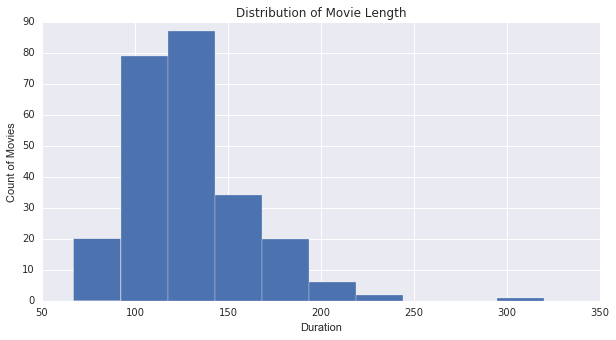

In [1196]:
raw_df["duration"].plot(kind = "hist", figsize = (10,5))
ax = plt.gca()
ax.set_title("Distribution of Movie Length")
ax.set_ylabel("Count of Movies")
ax.set_xlabel("Duration")
plt.show()

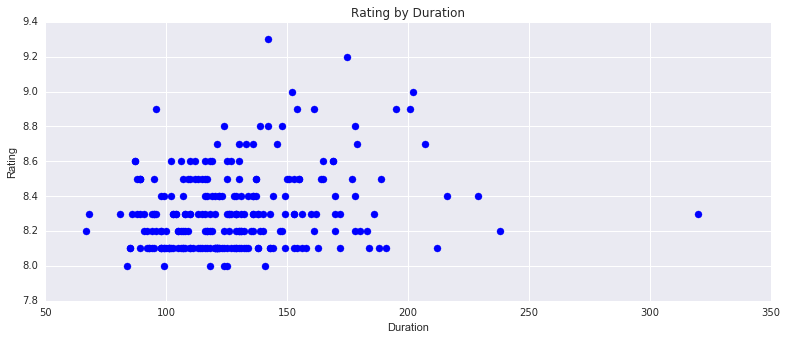

In [1197]:
fig = plt.figure(figsize=(13,5))
plt.scatter(raw_df["duration"], raw_df["rating"], s= 50, color = "blue")
plt.title("Rating by Duration")
plt.xlabel("Duration")
plt.ylabel("Rating")
plt.show()

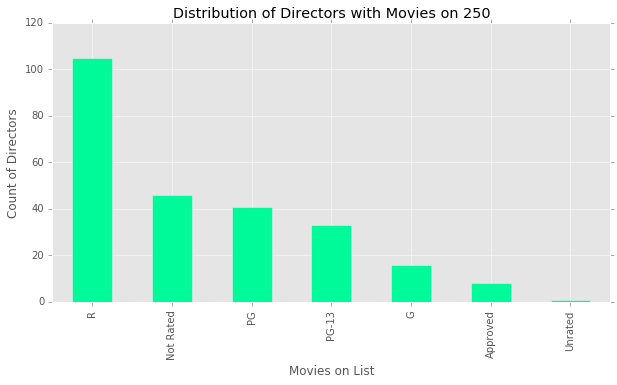

In [810]:
raw_df["cert"].value_counts().plot(kind = "bar", figsize = (10,5), color = "mediumspringgreen")

ax = plt.gca()
ax.set_title("Distribution of Directors with Movies on 250")
ax.set_ylabel("Count of Directors")
ax.set_xlabel("Movies on List")
plt.show()
#bulk of movies are set to R

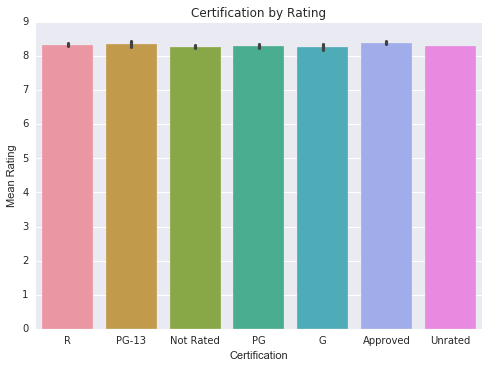

In [819]:
ax = sns.barplot(x = raw_df["cert"], y = raw_df["rating"])
ax.axes.set_title("Certification by Rating")
ax.set_ylabel("Mean Rating")
ax.set_xlabel("Certification")
plt.show()

#Doesn't seem like the means are all that different from each of the ratings

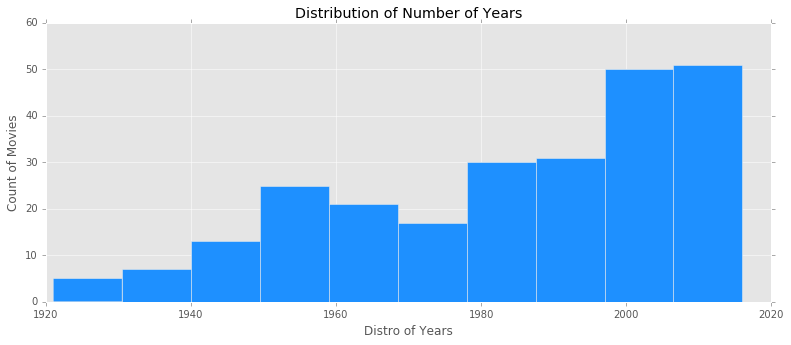

In [796]:
fig = plt.figure(figsize=(13,5))
plt.title("Distribution of Number of Years")
plt.xlabel("Distro of Years")
plt.ylabel("Count of Movies")

plt.hist(raw_df["year"], color = "dodgerblue")
plt.show()

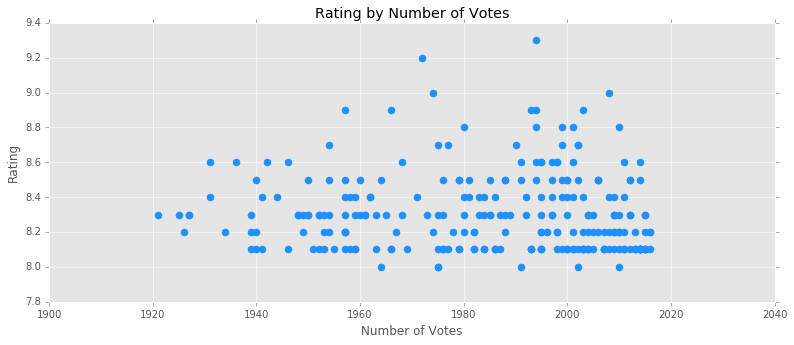

In [798]:
fig = plt.figure(figsize=(13,5))
plt.scatter(raw_df["year"], raw_df["rating"], s= 50, color = "dodgerblue")
plt.title("Rating by Number of Votes")
plt.xlabel("Number of Votes")
plt.ylabel("Rating")
plt.show()
#only vaguely shows a correlation 

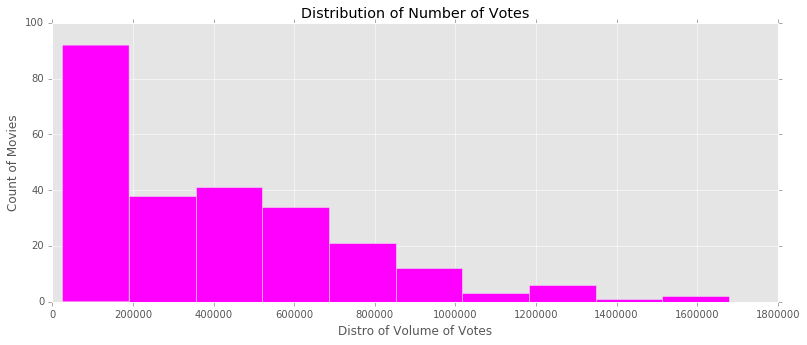

In [787]:
fig = plt.figure(figsize=(13,5))
plt.title("Distribution of Number of Votes")
plt.xlabel("Distro of Volume of Votes")
plt.ylabel("Count of Movies")

plt.hist(raw_df["num_votes"], color = "magenta")
plt.show()

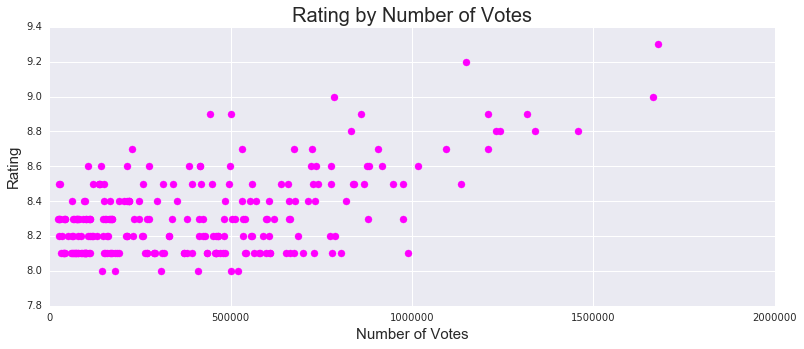

In [1199]:
fig = plt.figure(figsize=(13,5))
plt.scatter(raw_df["num_votes"], raw_df["rating"], s= 50, color = "magenta")
plt.title("Rating by Number of Votes", size = 20)
plt.xlabel("Number of Votes", size = 15)
plt.ylabel("Rating", size = 15)
plt.xlim(0, 2000000)
plt.show()
#Number of votes definitely shows a slight correlation to rating. Highest rated movie has the highest votes - might be hard to convert a rating once you have a high amount of votes

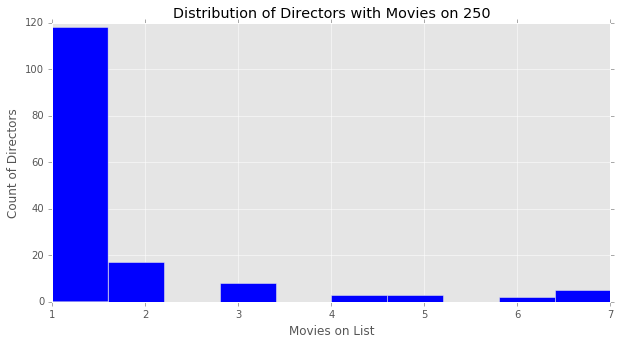

In [712]:
raw_df["director"].value_counts().plot(kind = "hist", figsize = (10,5), color = "blue")

ax = plt.gca()
ax.set_title("Distribution of Directors with Movies on 250")
ax.set_ylabel("Count of Directors")
ax.set_xlabel("Movies on List")
plt.show()

#nearly half of the directors only have 1 movie on the list although there are a few exceptions

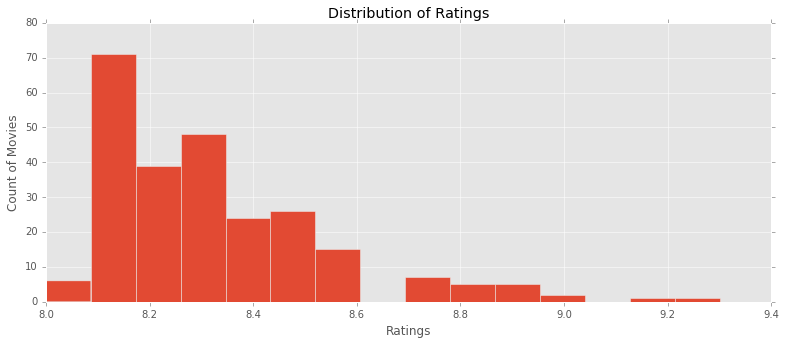

Median is  8.3
Mean is  8.3152


In [532]:
fig = plt.figure(figsize=(13,5))
plt.hist(raw_df["rating"], bins = 15)
plt.title("Distribution of Ratings")
plt.xlabel("Ratings")
plt.ylabel("Count of Movies")
plt.show()
plt.show

print "Median is ", np.median(raw_df["rating"])
print "Mean is ", np.mean(raw_df["rating"])

#Heavy right skew. Minimum is also 8.

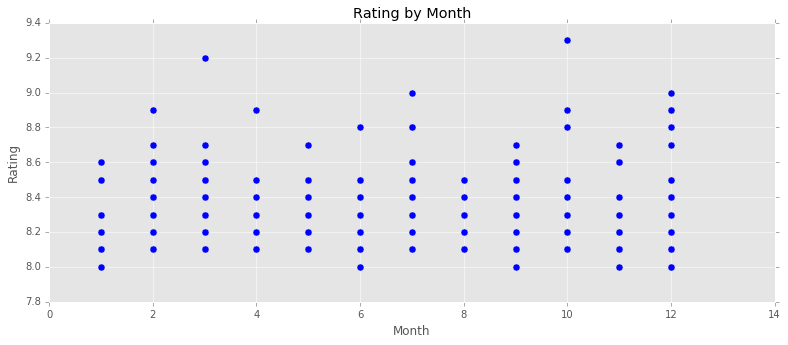

In [518]:
fig = plt.figure(figsize=(13,5))
plt.scatter(raw_df["month"], raw_df["rating"], s= 50)
plt.title("Rating by Month")
plt.xlabel("Month")
plt.ylabel("Rating")
plt.show()

#Doesn't seem like there's a super super clear correlation here between the month and the rating

Convert all the columns with multiple items in it to dummies for features and also to graph. This includes:
- Stars
- Keywords
- Genre
- Keywords

In [821]:
raw_df.head(2)

,num_votes,rating,tconst,title,year,cert,duration,stars,genre,month,keywords,director
0,1679506,9.3,tt0111161,The Shawshank Redemption,1994,R,142.0,"u\nTim Robbins, u\nMorgan Freeman, u\nBob Gunton","Crime, Drama",10,"prison, escape from prison, wrongful imprisonm...",Frank Darabont
1,1149127,9.2,tt0068646,The Godfather,1972,R,175.0,"u\nMarlon Brando, u\nAl Pacino, u\nJames Caan","Crime, Drama",3,"mafia, crime family, patriarch, rise to power,...",Francis Ford Coppola


In [822]:
from sklearn.feature_extraction.text import CountVectorizer

In [824]:
cv = CountVectorizer()
data = cv.fit_transform(raw_df['genre']).todense()
columns = ['genre_'+c for c in cv.get_feature_names()]
genre_df = pd.DataFrame(data, columns=columns)
genre_df.head()

,genre_action,genre_adventure,genre_animation,genre_biography,genre_comedy,genre_crime,genre_drama,genre_family,genre_fantasy,genre_fi,...,genre_music,genre_musical,genre_mystery,genre_noir,genre_romance,genre_sci,genre_sport,genre_thriller,genre_war,genre_western
0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


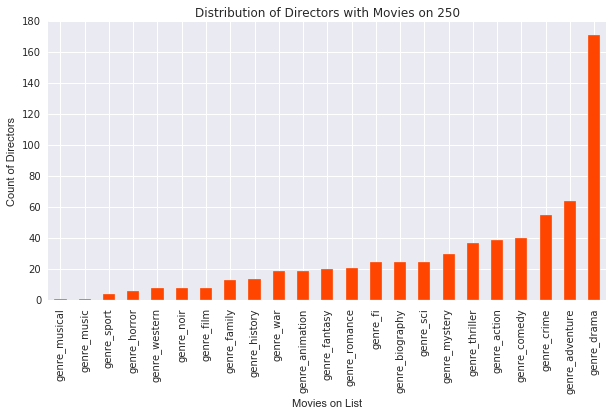

In [841]:
genre_df.sum(0).sort_values().plot(kind = "bar", figsize = (10,5), color = "orangered")

ax = plt.gca()
ax.set_title("Volume of Genres")
ax.set_ylabel("Count of Genres")
ax.set_xlabel("Genre")
plt.show()

#Drama by far has the most

In [825]:
#These keywords are not by phrase which is the way they originally came in - this is by individual keywords

cv = CountVectorizer()
data = cv.fit_transform(raw_df['keywords']).todense()
columns = ['keyword_'+c for c in cv.get_feature_names()]
keyword_df = pd.DataFrame(data, columns=columns)
keyword_df.head()

,keyword_14th,keyword_16th,keyword_1800s,keyword_18th,keyword_1910s,keyword_1920s,keyword_1930s,keyword_1943,keyword_1950s,keyword_1954,...,keyword_writer,keyword_writers,keyword_writing,keyword_written,keyword_wrong,keyword_wrongful,keyword_year,keyword_york,keyword_yuma,keyword_zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


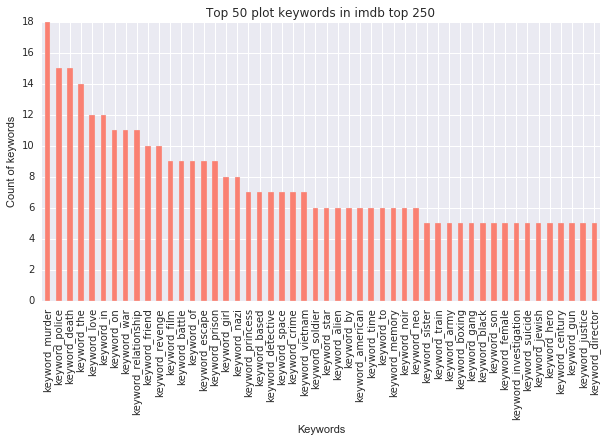

In [846]:
keyword_df.sum(0).sort_values(ascending = False)[0:50].plot(kind = "bar", figsize = (10,5), color = "salmon")

ax = plt.gca()
ax.set_title("Top 50 plot keywords in imdb top 250")
ax.set_ylabel("Count of keywords")
ax.set_xlabel("Keywords")
plt.show()

#Top 3 words are all around crime and drama - "love" is there too 

In [855]:
cv = CountVectorizer(token_pattern=u'(?u)\\w+\.?\\w?\.? \\w+')
data = cv.fit_transform(raw_df["director"]).todense()
columns = ['director_'+c for c in cv.get_feature_names()]
director_df = pd.DataFrame(data, columns=columns)
director_df.head()

,director_adam elliot,director_akira kurosawa,director_alan mak,director_alejandro g,director_alfred hitchcock,director_andrei tarkovskiy,director_andrew stanton,director_anthony russo,director_anurag kashyap,director_asghar farhadi,...,director_vittorio de,director_von donnersmarck,director_wai wong,director_wes anderson,director_william wyler,director_wilson yip,director_wolfgang petersen,director_woody allen,director_wook park,director_yasujiro ozu
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


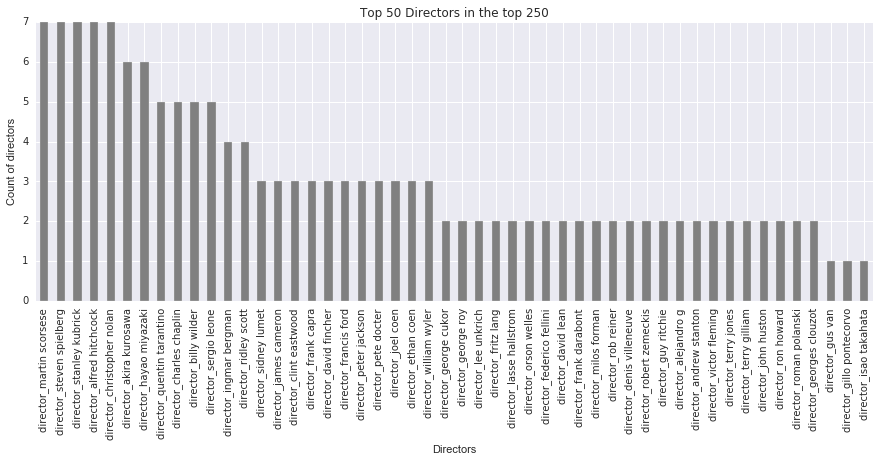

In [875]:
director_df.sum(0).sort_values(ascending = False)[0:50].plot(kind = "bar", figsize = (15,5), color = "gray")

ax = plt.gca()
ax.set_title("Top 50 Directors in the top 250")
ax.set_ylabel("Count of directors")
ax.set_xlabel("Directors")
plt.show()

#5 directors with 7 movies

In [869]:
cv = CountVectorizer(token_pattern=u'(?u)\\w+\.?\\w?\.? \\w+')
data = cv.fit_transform(raw_df["stars"]).todense()
columns = ['star_'+c for c in cv.get_feature_names()]
actor_df = pd.DataFrame(data, columns=columns)
actor_df.head()

,star_anne moss,star_der beek,star_ha kim,star_hiroyuki tagawa,star_ho song,star_jeong kang,star_kyung kim,star_naamir khan,star_naaron eckhart,star_nadolphe menjou,...,star_xedo grandinetti,star_xefd taghmaoui,star_xf3nica villa,star_xf4 mifune,star_xf4 t,star_xf4 yamamura,star_xf4ji matsuda,star_xfb ry,star_xfbko tanaka,star_xfcrgen prochnow
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


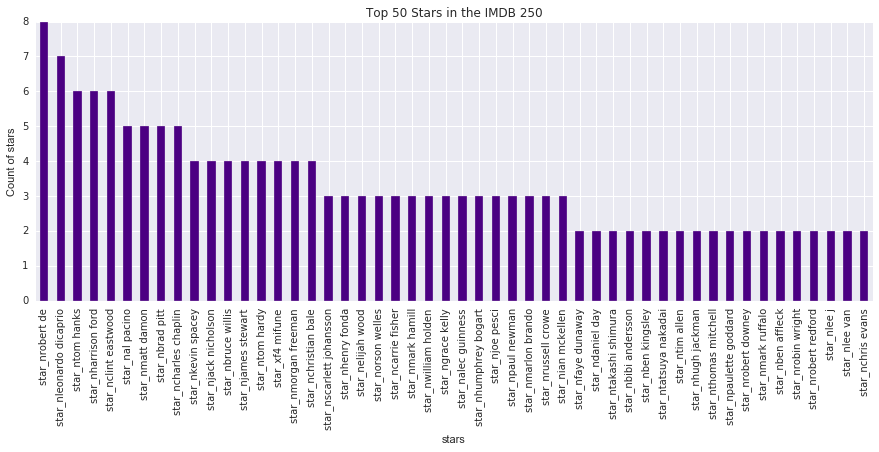

In [876]:
actor_df.sum(0).sort_values(ascending = False)[0:50].plot(kind = "bar", figsize = (15,5), color = "indigo")

ax = plt.gca()
ax.set_title("Top 50 Stars in the IMDB 250")
ax.set_ylabel("Count of stars")
ax.set_xlabel("stars")
plt.show()


## Set up the data for modelzzzzz

will treat y as a continuous variable

In [880]:
y = raw_df["rating"]

begin to find best features for X

In [919]:
format_df = raw_df

In [920]:
format_df.head()

,num_votes,rating,title,year,cert,duration,stars,genre,month,keywords,director
0,1679506,9.3,The Shawshank Redemption,1994,R,142.0,"u\nTim Robbins, u\nMorgan Freeman, u\nBob Gunton","Crime, Drama",10,"prison, escape from prison, wrongful imprisonm...",Frank Darabont
1,1149127,9.2,The Godfather,1972,R,175.0,"u\nMarlon Brando, u\nAl Pacino, u\nJames Caan","Crime, Drama",3,"mafia, crime family, patriarch, rise to power,...",Francis Ford Coppola
2,785866,9.0,The Godfather: Part II,1974,R,202.0,"u\nAl Pacino, u\nRobert De Niro, u\nRobert Duv...","Crime, Drama",12,"corrupt politician, revenge, 1950s, lake tahoe...",Francis Ford Coppola
3,1664606,9.0,The Dark Knight,2008,PG-13,152.0,"u\nChristian Bale, u\nHeath Ledger, u\nAaron E...","Action, Adventure, Crime",7,"dc comics, star died before release, based on ...",Christopher Nolan
4,859607,8.9,Schindler's List,1993,R,195.0,"u\nLiam Neeson, u\nRalph Fiennes, u\nBen Kings...","Biography, Drama, History",2,"jew, nazi, german soldier, jewish, german",Steven Spielberg


In [884]:
del format_df["tconst"]

In [921]:
format_df = pd.concat([format_df, pd.get_dummies(format_df["cert"])], axis = 1)

In [924]:
del format_df["rating"]
del format_df["cert"]

In [925]:
format_df = pd.concat([format_df, actor_df], axis = 1)
format_df = pd.concat([format_df, genre_df], axis = 1)
format_df = pd.concat([format_df, keyword_df], axis = 1)
format_df = pd.concat([format_df, director_df], axis = 1)

In [1200]:
print len(actor_df.columns)
print len(keyword_df.columns)
print len(director_df.columns)

584
1067
167


In [929]:
format_df.head()

del format_df["title"]
del format_df["stars"]
del format_df["keywords"]
del format_df["director"]

In [934]:
del format_df["genre"]

In [940]:
format_df.columns[1000]

u'keyword_for'

In [954]:
#drop column per set for dummies - based off of lowest number

del format_df["Unrated"]
del format_df["star_njohn travolta"]
del format_df["keyword_14th"]
del format_df["director_adam elliot"]


In [955]:
X = format_df

In [958]:
len(X.columns)
#there are a shit ton of columns

1848

In [1090]:
X.head()

,num_votes,year,duration,month,Approved,G,Not Rated,PG,PG-13,R,...,director_vittorio de,director_von donnersmarck,director_wai wong,director_wes anderson,director_william wyler,director_wilson yip,director_wolfgang petersen,director_woody allen,director_wook park,director_yasujiro ozu
0,1679506,1994,142.0,10,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,1149127,1972,175.0,3,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,785866,1974,202.0,12,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,1664606,2008,152.0,7,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,859607,1993,195.0,2,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0


## Fit Data to Trees Models

In [1091]:
#I RAN INTO AN ERROR FROM SCIKIT LEARN - SOMETHING ABOUT NAN OR INFINITY SO I GOOGLED AND THIS FIXED IT?
from sklearn.preprocessing import Imputer
X_imputer = Imputer().fit_transform(X)

In [1080]:
X_imputer

array([[  1.67950600e+06,   1.99400000e+03,   1.42000000e+02, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.14912700e+06,   1.97200000e+03,   1.75000000e+02, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  7.85866000e+05,   1.97400000e+03,   2.02000000e+02, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  4.47630000e+04,   2.01200000e+03,   3.20000000e+02, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  3.07008000e+05,   1.99100000e+03,   8.40000000e+01, ...,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  7.52240000e+04,   2.00000000e+03,   9.80000000e+01, ...,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00]])

In [1039]:
#FEATURE SELECTION

from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=500)
selected_data = selector.fit_transform(X_imputer, y)
kbest_columns = X.columns[selector.get_support()]
Xbest = pd.DataFrame(selected_data, columns=kbest_columns)
Xbest.columns

Index([                 u'num_votes',                       u'year',
                         u'duration',                      u'month',
                         u'Approved',                  u'Not Rated',
                            u'PG-13',             u'star_anne moss',
              u'star_naaron eckhart',            u'star_nal pacino',
       ...
            u'director_sergio leone',   u'director_stanley kubrick',
        u'director_steven spielberg',     u'director_terry gilliam',
             u'director_terry jones', u'director_thomas vinterberg',
        u'director_von donnersmarck',     u'director_william wyler',
             u'director_woody allen',         u'director_wook park'],
      dtype='object', length=500)

In [1153]:
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X_imputer)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = .33)
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(Xbest, y, test_size = .33)

### Decision Tree Regressor

In [1144]:
#FIRST TRY ALL FEATURES
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt_model = dt.fit(X_train, y_train)
dt_predict = dt_model.predict(X_test)

In [1145]:
#Not performing so hot here
from sklearn.metrics import r2_score

print "R^2 score: ", r2_score(y_test, dt_predict)
print "Mean 5 fold cv: ", cross_val_score(dt, X_test, y_test, cv = 5).mean()

R^2 score:  0.118348531917
Mean 5 fold cv:  0.114364325728


In [1132]:
#TRY ONLY BEST EFATURES
#HOW DID THIS GET A SUPER HIGH R SQUARED??

dt = DecisionTreeRegressor()
dt_model_sel = dt.fit(X_train_sel, y_train)
dt_predict_sel = dt_model_sel.predict(X_test_sel)
print "R^2 score: ", r2_score(y_test, dt_predict_sel)
print "Mean 5 fold cv: ", cross_val_score(dt, X_test_sel, y_test, cv = 5).mean()

R^2 score:  -1.22822676243
Mean 5 fold cv:  -1.94564018985


### Bagged Decision Tree Regressor

In [1139]:
#Much Better for all features

from sklearn.ensemble import BaggingRegressor

bdt = BaggingRegressor(DecisionTreeRegressor())
bdt_model = bdt.fit(X_train, y_train)
bdt_predict = bdt_model.predict(X_test)
print "R^2 score: ", r2_score(y_test, bdt_predict)
print "Mean 5 fold cv: ", cross_val_score(bdt, X_test, y_test, cv = 5).mean()

R^2 score:  0.343987070199
Mean 5 fold cv:  -0.0172621931746


In [1042]:
#really bad for feature selection
bdt = BaggingRegressor(DecisionTreeRegressor())
bdt_model_sel = bdt.fit(X_train_sel, y_train)
bdt_predict_sel = bdt_model_sel.predict(X_test_sel)
print "R^2 score: ", r2_score(y_test, bdt_predict_sel)
print "Mean 5 fold cv: ", cross_val_score(bdt, X_test_sel, y_test, cv = 5).mean()

R^2 score:  -0.234760741399
Mean 5 fold cv:  -0.488182172626


### Random Forest Regressor

In [1152]:
#performs better than decision tree but slightly better than Bagged Decision Tree
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf_model = rf.fit(X_train, y_train)
rf_predict = rf_model.predict(X_test)
print "R^2 score: ", r2_score(y_test, rf_predict)
print "Mean 5 fold cv: ", cross_val_score(rf, X_test, y_test, cv = 5).mean()

R^2 score:  0.292699940582
Mean 5 fold cv:  0.281775649585


In [1044]:
rf = RandomForestRegressor()
rf_model_sel = rf.fit(X_train_sel, y_train)
rf_predict_sel = rf_model_sel.predict(X_test_sel)
print "R^2 score: ", r2_score(y_test, rf_predict_sel)
print "Mean 5 fold cv: ", cross_val_score(rf, X_test_sel, y_test, cv = 5).mean()

R^2 score:  -0.16667218543
Mean 5 fold cv:  -0.298991273229


### Gradient Boost Regressor

In [1154]:
#EVEN BETTER!!!

from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb_model = gb.fit(X_train, y_train)
gb_predict = gb_model.predict(X_test)
print "R^2 score: ", r2_score(y_test, gb_predict)
print "Mean 5 fold cv: ", cross_val_score(gb, X_test, y_test, cv = 5).mean()

R^2 score:  0.482030432666
Mean 5 fold cv:  0.133228917851


In [1046]:
gb = GradientBoostingRegressor()
gb_model_sel = gb.fit(X_train_sel, y_train)
gb_predict_sel = gb_model_sel.predict(X_test_sel)
print "R^2 score: ", r2_score(y_test, gb_predict_sel)
print "Mean 5 fold cv: ", cross_val_score(gb, X_test_sel, y_test, cv = 5).mean()

R^2 score:  -0.263507204988
Mean 5 fold cv:  -0.457552889332


### Extra Trees Regressor

In [1142]:
from sklearn.tree import ExtraTreeRegressor

et = ExtraTreeRegressor()
et_model = et.fit(X_train, y_train)
et_predict = et_model.predict(X_test)
print "R^2 score: ", r2_score(y_test, et_predict)
print "Mean 5 fold cv: ", cross_val_score(et, X_test, y_test, cv = 5).mean()

R^2 score:  0.313833743349
Mean 5 fold cv:  -0.73418620644


In [1048]:
et = ExtraTreeRegressor()
et_model_sel = et.fit(X_train_sel, y_train)
et_predict_sel = et_model_sel.predict(X_test_sel)
print "R^2 score: ", r2_score(y_test, et_predict_sel)
print "Mean 5 fold cv: ", cross_val_score(et, X_test_sel, y_test, cv = 5).mean()

R^2 score:  -0.399309481505
Mean 5 fold cv:  -1.48162024734


GradientBoost performs the best with all features - will execute GridSearchCV to try to make it better

In [1049]:
from sklearn.grid_search import GridSearchCV


gb_params = {'n_estimators': [50, 100, 200, 300, 500],
                  'max_depth': [1,3,5,15,25,75,100,200],
                  'max_features': [.25, .50, .75, 1.0]}


gbgrid = GridSearchCV(gb, gb_params)
gbgrid.fit(X_train, y_train)
gbgrid.best_params_

{'max_depth': 5, 'max_features': 0.5, 'n_estimators': 200}

In [1050]:
gbgrid_model = gbgrid.fit(X_train, y_train)
gbgrid_predict = gbgrid_model.predict(X_test)
print "R^2 score: ", r2_score(y_test, gbgrid_predict)
print "Mean 5 fold cv: ", cross_val_score(gbgrid, X_test, y_test, cv = 5).mean()

R^2 score:  0.533865563184
Mean 5 fold cv:  0.38925884162


In [1051]:
#Did not perform better

In [ ]:
#Try remove plot keywords

In [1054]:
test_df = format_df

In [1063]:
removelist = test_df.columns.values.tolist()

In [1065]:
indices = [i for i, s in enumerate(removelist) if 'keyword' in s]

In [1066]:
indices

[616,
 617,
 618,
 619,
 620,
 621,
 622,
 623,
 624,
 625,
 626,
 627,
 628,
 629,
 630,
 631,
 632,
 633,
 634,
 635,
 636,
 637,
 638,
 639,
 640,
 641,
 642,
 643,
 644,
 645,
 646,
 647,
 648,
 649,
 650,
 651,
 652,
 653,
 654,
 655,
 656,
 657,
 658,
 659,
 660,
 661,
 662,
 663,
 664,
 665,
 666,
 667,
 668,
 669,
 670,
 671,
 672,
 673,
 674,
 675,
 676,
 677,
 678,
 679,
 680,
 681,
 682,
 683,
 684,
 685,
 686,
 687,
 688,
 689,
 690,
 691,
 692,
 693,
 694,
 695,
 696,
 697,
 698,
 699,
 700,
 701,
 702,
 703,
 704,
 705,
 706,
 707,
 708,
 709,
 710,
 711,
 712,
 713,
 714,
 715,
 716,
 717,
 718,
 719,
 720,
 721,
 722,
 723,
 724,
 725,
 726,
 727,
 728,
 729,
 730,
 731,
 732,
 733,
 734,
 735,
 736,
 737,
 738,
 739,
 740,
 741,
 742,
 743,
 744,
 745,
 746,
 747,
 748,
 749,
 750,
 751,
 752,
 753,
 754,
 755,
 756,
 757,
 758,
 759,
 760,
 761,
 762,
 763,
 764,
 765,
 766,
 767,
 768,
 769,
 770,
 771,
 772,
 773,
 774,
 775,
 776,
 777,
 778,
 779,
 780,
 781,
 782

In [1069]:
test_df = test_df.drop(test_df[indices], axis = 1)

In [1070]:
len(test_df)

250

In [1071]:
len(test_df.columns)

782

In [1072]:
#Fit model

In [1073]:
X_tested = Imputer().fit_transform(test_df)

In [1074]:
X_train, X_test, y_train, y_test = train_test_split(X_tested, y, test_size = .33)

gb = GradientBoostingRegressor()
gb_model = gb.fit(X_train, y_train)
gb_predict = gb_model.predict(X_test)
print "R^2 score: ", r2_score(y_test, gb_predict)
print "Mean 5 fold cv: ", cross_val_score(gb, X_test, y_test, cv = 5).mean()

R^2 score:  0.432299825732
Mean 5 fold cv:  0.220928824946


In [1075]:
bdt = BaggingRegressor(DecisionTreeRegressor())
bdt_model = bdt.fit(X_train, y_train)
bdt_predict = bdt_model.predict(X_test)
print "R^2 score: ", r2_score(y_test, bdt_predict)
print "Mean 5 fold cv: ", cross_val_score(bdt, X_test, y_test, cv = 5).mean()

R^2 score:  0.32045935906
Mean 5 fold cv:  0.122585883486


In [1076]:
et = ExtraTreeRegressor()
et_model = et.fit(X_train, y_train)
et_predict = et_model.predict(X_test)
print "R^2 score: ", r2_score(y_test, et_predict)
print "Mean 5 fold cv: ", cross_val_score(et, X_test, y_test, cv = 5).mean()

R^2 score:  0.187763362165
Mean 5 fold cv:  -0.028466531268


In [1077]:
dt = DecisionTreeRegressor()
dt_model = dt.fit(X_train, y_train)
dt_predict = dt_model.predict(X_test)
print "R^2 score: ", r2_score(y_test, dt_predict)
print "Mean 5 fold cv: ", cross_val_score(dt, X_test, y_test, cv = 5).mean()

R^2 score:  0.242986249723
Mean 5 fold cv:  -0.393929155038


In [ ]:
#Gradient boost still works best but works slightly better with all features

## Plot out how our final model

In [1190]:
#FINAL MODEL

gb = GradientBoostingRegressor()
gb_model = gb.fit(X_train, y_train)
gb_predict = gb_model.predict(X_test)
print "R^2 score: ", r2_score(y_test, gb_predict)
print "Mean 5 fold cv: ", cross_val_score(gb, X_test, y_test, cv = 5).mean()

R^2 score:  0.480310856783
Mean 5 fold cv:  0.158515981054


In [1205]:
importances = gb_model.feature_importances_

In [1206]:
indices = np.argsort(importances)[::-1]

In [1207]:
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 0 (0.139037)
2. feature 1 (0.074858)
3. feature 2 (0.036663)
4. feature 1824 (0.029333)
5. feature 1233 (0.027916)
6. feature 1826 (0.023111)
7. feature 1806 (0.022471)
8. feature 1698 (0.021706)
9. feature 1563 (0.018738)
10. feature 1691 (0.016667)
11. feature 976 (0.015851)
12. feature 613 (0.015764)
13. feature 4 (0.014464)
14. feature 668 (0.013178)
15. feature 753 (0.012880)
16. feature 1108 (0.011432)
17. feature 1269 (0.010664)
18. feature 1150 (0.009700)
19. feature 3 (0.009317)
20. feature 1724 (0.009280)
21. feature 1260 (0.009176)
22. feature 279 (0.008992)
23. feature 369 (0.008990)
24. feature 1046 (0.008751)
25. feature 758 (0.008272)
26. feature 1287 (0.008142)
27. feature 257 (0.007678)
28. feature 564 (0.007620)
29. feature 1156 (0.007607)
30. feature 377 (0.007413)
31. feature 934 (0.006774)
32. feature 1682 (0.006726)
33. feature 1694 (0.006691)
34. feature 1663 (0.006681)
35. feature 657 (0.006651)
36. feature 278 (0.006600)
37. feature 

In [1158]:
#top 8 features:

print X.columns[0]
print X.columns[1]
print X.columns[2]
print X.columns[1824]
print X.columns[1233]
print X.columns[1826]
print X.columns[1806]
print X.columns[1698]


num_votes
year
duration
director_stanley kubrick
keyword_mexican
director_steven spielberg
director_ridley scott
director_charles chaplin


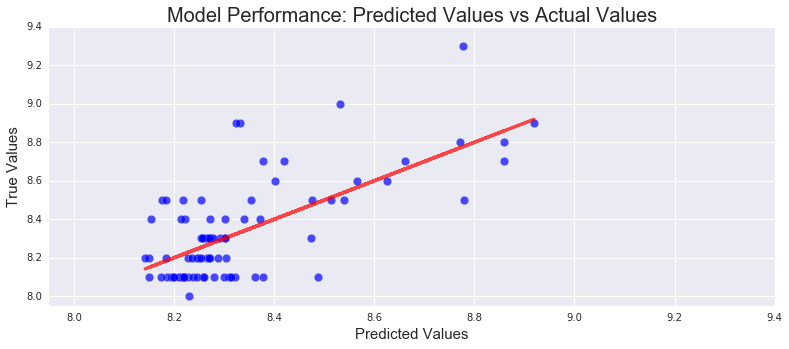

In [1191]:
fig = plt.figure(figsize=(13,5))
plt.scatter(gb_predict, y_test, s = 70, alpha = .7)
plt.plot(gb_predict, [x for x in gb_predict], color='red', alpha = .7, linewidth = 3)
ax = plt.gca()
ax.set_xlim(7.95, 9.4)
ax.set_ylim(7.95, 9.4)
plt.title("Model Performance: Predicted Values vs Actual Values", size = 20)
plt.xlabel("Predicted Values", size = 15)
plt.ylabel("True Values", size = 15)
plt.show()

In [1193]:
max(raw_df["rating"])

9.3000000000000007

In [1194]:
raw_df.head()

,num_votes,rating,title,year,cert,duration,stars,genre,month,keywords,director
0,1679506,9.3,The Shawshank Redemption,1994,R,142.0,"u\nTim Robbins, u\nMorgan Freeman, u\nBob Gunton","Crime, Drama",10,"prison, escape from prison, wrongful imprisonm...",Frank Darabont
1,1149127,9.2,The Godfather,1972,R,175.0,"u\nMarlon Brando, u\nAl Pacino, u\nJames Caan","Crime, Drama",3,"mafia, crime family, patriarch, rise to power,...",Francis Ford Coppola
2,785866,9.0,The Godfather: Part II,1974,R,202.0,"u\nAl Pacino, u\nRobert De Niro, u\nRobert Duv...","Crime, Drama",12,"corrupt politician, revenge, 1950s, lake tahoe...",Francis Ford Coppola
3,1664606,9.0,The Dark Knight,2008,PG-13,152.0,"u\nChristian Bale, u\nHeath Ledger, u\nAaron E...","Action, Adventure, Crime",7,"dc comics, star died before release, based on ...",Christopher Nolan
4,859607,8.9,Schindler's List,1993,R,195.0,"u\nLiam Neeson, u\nRalph Fiennes, u\nBen Kings...","Biography, Drama, History",2,"jew, nazi, german soldier, jewish, german",Steven Spielberg


In [1202]:
gb_predict_all = gb_model.predict(X_scaled)

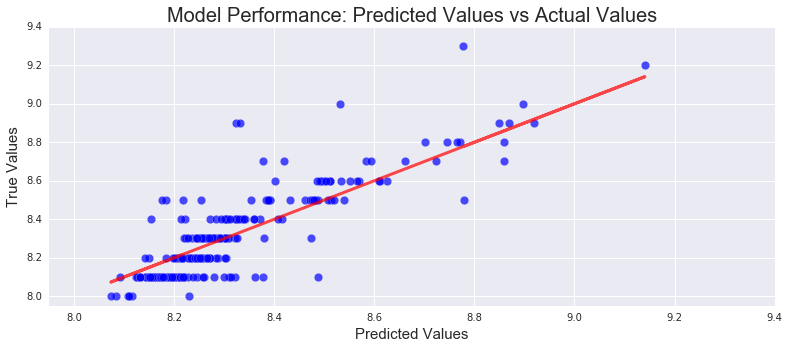

In [1203]:
#APPLIED MODEL TO ALL
fig = plt.figure(figsize=(13,5))
plt.scatter(gb_predict_all, y, s = 70, alpha = .7)
plt.plot(gb_predict_all, [x for x in gb_predict_all], color='red', alpha = .7, linewidth = 3)
ax = plt.gca()
ax.set_xlim(7.95, 9.4)
ax.set_ylim(7.95, 9.4)
plt.title("Model Performance: Predicted Values vs Actual Values", size = 20)
plt.xlabel("Predicted Values", size = 15)
plt.ylabel("True Values", size = 15)
plt.show()

In [1204]:
print "R^2 score: ", r2_score(y, gb_predict_all)
print "Mean 5 fold cv: ", cross_val_score(gb, X_scaled, y, cv = 5).mean()

R^2 score:  0.724127432377
Mean 5 fold cv:  -7.40285336161
